In [35]:
# # Allow autoreload as we develop the GMT in parallel
# %load_ext autoreload
# %autoreload 2

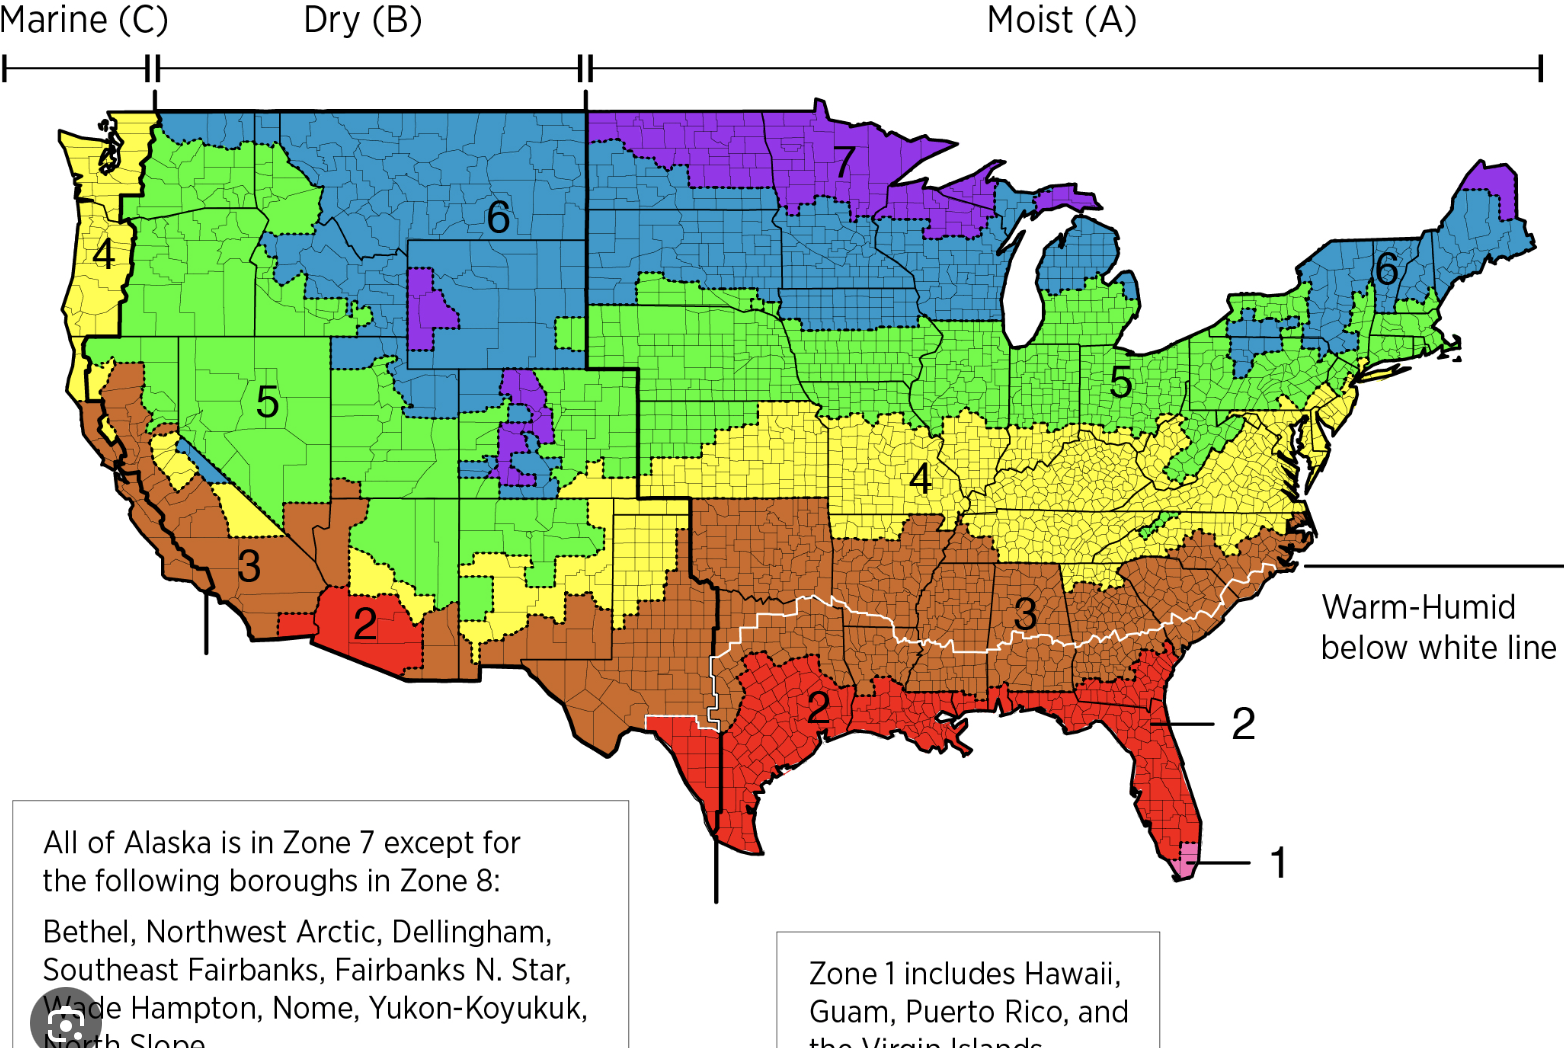

In [36]:
import warnings
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

dataset_path = Path().resolve() / "datasets"
# get the full path
print(f"Dataset path: {dataset_path}")

data_path = dataset_path / "comstock"
# get the full path
print(f"Data path: {data_path}")

figures_path = Path().resolve() / "figures"
print(f"Figures path: {figures_path}")

# auto reload any changes in the module
%load_ext autoreload

warnings.filterwarnings("ignore", category=FutureWarning)
# ignore SettingWithCopyWarning
pd.options.mode.chained_assignment = None

Dataset path: C:\NREL\compare-building-data\datasets
Data path: C:\NREL\compare-building-data\datasets\comstock
Figures path: C:\NREL\compare-building-data\figures
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# ComStock

### Pull down ComStock data

To do this, you should be able to just simply run the `comstock_processor.py` file within VSCode. The data will be saved into 
the ComStock subfolder. It takes a while to run (10ish minutes).

In [37]:
# %run comstock_processor.py

### Read in ComStock data

In [38]:
# read in the comstock exported file, yes we could just read the parquet, maybe update?
df_all = pd.read_csv(data_path / "All-All-All-0-selected_metadata.csv")

C:\Users\lkerr\AppData\Local\Temp\1\ipykernel_26764\2618151790.py:2: DtypeWarning: Columns (15,57,500) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(data_path / "All-All-All-0-selected_metadata.csv")


In [39]:
# get the dimensions
print(df_all.shape)
# show all states
print(df_all["in.state"].unique())
# show all the building types
print(df_all["in.comstock_building_type"].unique())

(336149, 706)
['AL' 'AK' 'AZ' 'AR' 'CA' 'CO' 'CT' 'DE' 'DC' 'FL' 'GA' 'HI' 'ID' 'IL'
 'IN' 'IA' 'KS' 'KY' 'LA' 'ME' 'MD' 'MA' 'MI' 'MN' 'MS' 'MO' 'MT' 'NE'
 'NV' 'NH' 'NJ' 'NM' 'NY' 'NC' 'ND' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD'
 'TN' 'TX' 'UT' 'VT' 'VA' 'WA' 'WV' 'WI' 'WY']
['SmallOffice' 'Warehouse' 'RetailStripmall' 'SecondarySchool'
 'RetailStandalone' 'FullServiceRestaurant' 'Outpatient'
 'QuickServiceRestaurant' 'MediumOffice' 'LargeOffice' 'SmallHotel'
 'PrimarySchool' 'LargeHotel' 'Hospital']


In [40]:
# save the names of the fields to a list
fields = df_all.columns
with open(data_path / "fields.txt", "w") as f:
    f.write("\n".join(fields))

# force the climate zone to be a string
df_all["in.ashrae_iecc_climate_zone_2006"] = df_all["in.ashrae_iecc_climate_zone_2006"].astype(str)
# print the unique values
print(df_all["in.ashrae_iecc_climate_zone_2006"].unique())

['2A' '3A' '7' '8' '2B' '5B' '3B' '4B' '4A' '3C' '4C' '6B' '7B' '5A' '1A'
 '6A' '7A']


In [41]:
# find if climate zone 7A or 7B or 7
df_cz7 = df_all[df_all["in.ashrae_iecc_climate_zone_2006"].str.contains("7")]
print(df_cz7["in.state"].unique())
df_co_cz7 = df_cz7[df_cz7["in.state"] == "CO"]
df_pitkin = df_all[df_all["in.county_name"] == "CO, Pitkin County"]

# print the dimensions for each dataframe
print(f"all: {df_all.shape}")
print(f"cz7: {df_cz7.shape}")
print(f"cz7 co: {df_co_cz7.shape}")
print(f"cz7 pitkin: {df_pitkin.shape}")

['AK' 'CO' 'ME' 'MI' 'MN' 'ND' 'WI' 'WY']
all: (336149, 706)
cz7: (2335, 706)
cz7 co: (184, 706)
cz7 pitkin: (22, 706)


In [42]:
display(df_cz7)
display(df_pitkin)

# # list all the columns that have "weighted" and "intensity" in the name
# weighted_cols = [col for col in df_all.columns if 'weighted' in col]
# print(weighted_cols)

bldg_id  metadata_index  upgrade    weight   in.sqft  \
5193       5363            5193        0  8.814271   17500.0   
5195       5366            5195        0  7.692562  350000.0   
5196       5367            5196        0  3.330450    1000.0   
5197       5369            5197        0  3.330450   17500.0   
5199       5372            5199        0  3.330450   17500.0   
...         ...             ...      ...       ...       ...   
335163   236715          335163        0  5.375590   17500.0   
335787     5570          335787        0  9.356649  750000.0   
335925   170420          335925        0  5.375590   75000.0   
335998   236192          335998        0  9.356649  750000.0   
335999   236374          335999        0  9.356649  350000.0   

        calc.weighted.sqft in.upgrade_name  applicability  \
5193          1.542497e+05        Baseline           True   
5195          2.692397e+06        Baseline           True   
5196          3.330450e+03        Baseline           True   
5197          5.828288e+04        Baseline           True   
5199          5.828288e+04        Baseline           True   
...                    ...             ...            ...   
335163        9.407283e+04        Baseline           True   
335787        7.017487e+06        Baseline           True   
335925        4.031693e+05        Baseline           True   
335998        7.017487e+06        Baseline           True   
335999        3.274827e+06        Baseline           True   

       in.building_america_climate_zone in.cambium_grid_region  ...  \
5193                          Very Cold                   AKGD  ...   
5195                          Very Cold                   AKGD  ...   
5196                          Very Cold                   AKGD  ...   
5197                          Very Cold                   AKGD  ...   
5199                          Very Cold                   AKGD  ...   
...                                 ...                    ...  ...   
335163                        Very Cold                  MROWc  ...   
335787                        Very Cold                   AKGD  ...   
335925                        Very Cold                  MROWc  ...   
335998                        Very Cold                  MROWc  ...   
335999                        Very Cold                  MROWc  ...   

       calc.weighted.savings.natural_gas.interior_equipment.energy_consumption..tbtu  \
5193                                                  0.0                              
5195                                                  0.0                              
5196                                                  0.0                              
5197                                                  0.0                              
5199                                                  0.0                              
...                                                   ...                              
335163                                                0.0                              
335787                                                0.0                              
335925                                                0.0                              
335998                                                0.0                              
335999                                                0.0                              

       calc.weighted.savings.natural_gas.total.energy_consumption..tbtu  \
5193                                                  0.0                 
5195                                                  0.0                 
5196                                                  0.0                 
5197                                                  0.0                 
5199                                                  0.0                 
...                                                   ...                 
335163                                                0.0              

bldg_id  metadata_index  upgrade     weight   in.sqft  \
54124    57023           54124        0   7.688410   17500.0   
54211    57111           54211        0   3.330450   17500.0   
54382    57289           54382        0   1.886010   37500.0   
54421    57328           54421        0   8.814271    7500.0   
54577    57487           54577        0   7.692562  150000.0   
54673    57586           54673        0   8.814271    3000.0   
54818    57736           54818        0   1.886010    3000.0   
54885    57808           54885        0   3.330450   17500.0   
54899    57822           54899        0   1.886010    3000.0   
54977    57901           54977        0   1.886010   17500.0   
55007    57931           55007        0   1.886010   17500.0   
56279    59295           56279        0  11.250632   37500.0   
56405    59438           56405        0   1.886010    7500.0   
57296    60398           57296        0   1.886010    1000.0   
57327    60435           57327        0   1.886010    7500.0   
57650    60793           57650        0   3.330450   17500.0   
57746    60900           57746        0   6.234825   17500.0   
58474    61684           58474        0   3.317682    7500.0   
58508    61718           58508        0   6.234825    7500.0   
58650    61875           58650        0   7.692562   75000.0   
58775    62013           58775        0   8.814271   17500.0   
58932    62184           58932        0   7.688410    3000.0   

       calc.weighted.sqft in.upgrade_name  applicability  \
54124        1.345472e+05        Baseline           True   
54211        5.828288e+04        Baseline           True   
54382        7.072536e+04        Baseline           True   
54421        6.610703e+04        Baseline           True   
54577        1.153884e+06        Baseline           True   
54673        2.644281e+04        Baseline           True   
54818        5.658029e+03        Baseline           True   
54885        5.828288e+04        Baseline           True   
54899        5.658029e+03        Baseline           True   
54977        3.300517e+04        Baseline           True   
55007        3.300517e+04        Baseline           True   
56279        4.218987e+05        Baseline           True   
56405        1.414507e+04        Baseline           True   
57296        1.886010e+03        Baseline           True   
57327        1.414507e+04        Baseline           True   
57650        5.828288e+04        Baseline           True   
57746        1.091094e+05        Baseline           True   
58474        2.488262e+04        Baseline           True   
58508        4.676119e+04        Baseline           True   
58650        5.769422e+05        Baseline           True   
58775        1.542497e+05        Baseline           True   
58932        2.306523e+04        Baseline           True   

      in.building_america_climate_zone in.cambium_grid_region  ...  \
54124                        Very Cold                  RMPAc  ...   
54211                        Very Cold                  RMPAc  ...   
54382                        Very Cold                  RMPAc  ...   
54421                        Very Cold                  RMPAc  ...   
54577                        Very Cold                  RMPAc  ...   
54673                        Very Cold                  RMPAc  ...   
54818                        Very Cold                  RMPAc  ...   
54885                        Very Cold                  RMPAc  ...   
54899                        Very Cold                  RMPAc  ...   
54977                        Very Cold                  RMPAc  ...   
55007                        Very Cold                  RMPAc  ...   
56279                        Very Cold                  RMPAc  ...   
56405                        Very Cold                  RMPAc  ...   
57296                        Very Cold                  RMPAc  ...   
57327                        Very Cold                  RMPAc  ...   
57650                        Very

count    2335.000000
mean       52.925934
std        56.960314
min         6.046074
25%        22.230741
50%        35.081481
75%        57.075574
max       549.534259
Name: out.site_energy.total.energy_consumption_intensity, dtype: float64


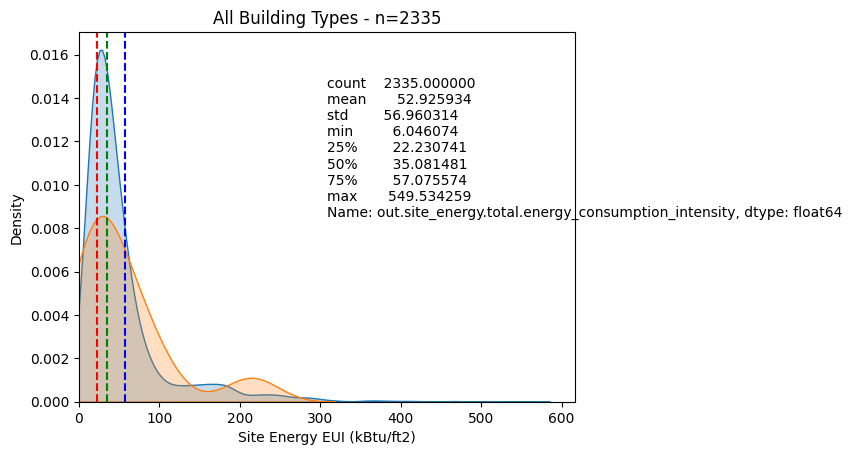

In [43]:
# use seaborn

# return the quartiles of the column out.site_energy.total.energy_consumption_intensity
print(df_cz7["out.site_energy.total.energy_consumption_intensity"].describe())

# create kernel density plot of the column out.site_energy.total.energy_consumption_intensity, using seaborn
sns.kdeplot(df_cz7["out.site_energy.total.energy_consumption_intensity"], shade=True)
# add dashed lines for the quartiles
describe_data = df_cz7["out.site_energy.total.energy_consumption_intensity"].describe()
plt.axvline(describe_data["25%"], color="r", linestyle="--")
plt.axvline(describe_data["50%"], color="g", linestyle="--")
plt.axvline(describe_data["75%"], color="b", linestyle="--")
plt.xlabel("Site Energy EUI (kBtu/ft2)")
plt.title(f"All Building Types - n={len(df_cz7)}")
# display the quartiles in a text box
plt.text(0.5, 0.5, describe_data, transform=plt.gca().transAxes)
plt.xlim(0)

# add in the df_piitkin data
sns.kdeplot(df_pitkin["out.site_energy.total.energy_consumption_intensity"], shade=True)
plt.show()

{0.0: 10.177777777777775,
 0.25: 21.65119047619047,
 0.5: 27.288650793650795,
 0.75: 35.71002645502646,
 1.0: 549.5342592592592}

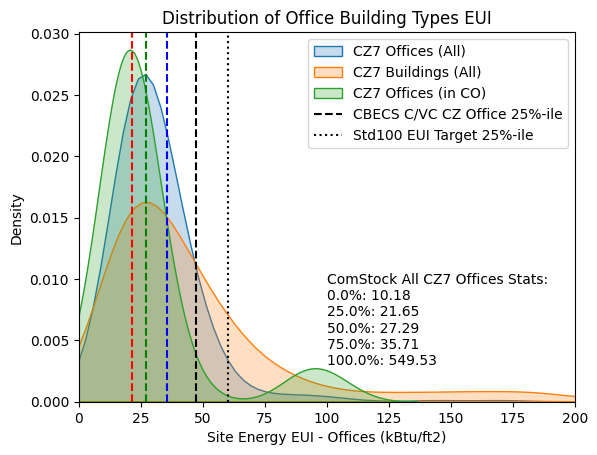

In [44]:
# create KDE's for only "SmallOffice", "MediumOffice", "LargeOffice"
df_cz7_office = df_cz7[df_cz7["in.comstock_building_type"].isin(["SmallOffice", "MediumOffice", "LargeOffice"])]
df_cz7_co_office = df_co_cz7[df_co_cz7["in.comstock_building_type"].isin(["SmallOffice", "MediumOffice", "LargeOffice"])]

# create kernel density plot of the column out.site_energy.total.energy_consumption_intensity, using seaborn
sns.kdeplot(df_cz7_office["out.site_energy.total.energy_consumption_intensity"], fill=True, legend=True)
# add in the df_piitkin data
sns.kdeplot(df_cz7["out.site_energy.total.energy_consumption_intensity"], fill=True, legend=True)
sns.kdeplot(df_cz7_co_office["out.site_energy.total.energy_consumption_intensity"], fill=True, legend=True)
# add dashed lines for the quartiles
describe_data = df_cz7_office["out.site_energy.total.energy_consumption_intensity"].quantile([0, 0.25, 0.5, 0.75, 1.0])
describe_data = describe_data.to_dict()
display(describe_data)
# show only describe from the column out.site_energy.total.energy_consumption_intensity

# add line at 47.2 called CBECS C/VC CZ Office
plt.axvline(47.2, color="k", linestyle="--", label="CBECS C/VC CZ Office")
plt.axvline(60, color="k", linestyle=":", label="ASHRAE Std 100")

plt.axvline(describe_data[0.25], color="r", linestyle="--")
plt.axvline(describe_data[0.5], color="g", linestyle="--")
plt.axvline(describe_data[0.75], color="b", linestyle="--")
plt.xlabel("Site Energy EUI - Offices (kBtu/ft2)")
plt.title("Distribution of Office Building Types EUI")


# display the quartiles in a text box
textstr = "ComStock All CZ7 Offices Stats:\n" + "\n".join([f"{k*100}%: {v:.2f}" for k, v in describe_data.items()])

plt.text(0.5, 0.1, textstr, transform=plt.gca().transAxes)
plt.xlim(0, 200)

# add legend
plt.legend(["CZ7 Offices (All)", "CZ7 Buildings (All)", "CZ7 Offices (in CO)", "CBECS C/VC CZ Office 25%-ile", "Std100 EUI Target 25%-ile"])

plt.show()

# CBECS



In [45]:
# read in the xlsx spreadsheet sheet called cbecs2018_final_public

cbecs2018 = pd.read_excel(dataset_path / "cbecs" / "cbecs2018_final_public.xlsx", sheet_name="cbecs2018_final_public")

In [46]:
display(cbecs2018)

PUBID  REGION  CENDIV  PBA  PUBCLIM    SQFT  SQFTC  WLCNS  RFCNS  \
0         1       3       5    2        3  210000      8      1      4   
1         2       4       9    2        4   28000      5      1      6   
2         3       3       5    8        4    2100      2      1      4   
3         4       3       7    5        5  240000      8      2      6   
4         5       1       2    5        3  295000      8      3      6   
...     ...     ...     ...  ...      ...     ...    ...    ...    ...   
6431   6432       4       8   14        2  130000      7      1      1   
6432   6433       3       7    1        4    1050      2      1      5   
6433   6434       3       5    2        4  122000      7      2      6   
6434   6435       3       5   23        4   15000      4      3      5   
6435   6436       1       2   14        7  188000      7      1      6   

      RFCOOL  ...  ZMFBTU  ZMFEXP  ZELCNS  ZELEXP  ZNGCNS  ZNGEXP  ZFKCNS  \
0          2  ...       0       0       0       0       9       9       1   
1          1  ...       0       0       0       0       0       0       9   
2          2  ...       0       0       0       0       9       9       9   
3          1  ...       0       0       0       0       1       1       9   
4          2  ...       0       0       0       0       0       0       9   
...      ...  ...     ...     ...     ...     ...     ...     ...     ...   
6431       2  ...       0       0       0       0       0       0       9   
6432       2  ...       9       9       9       9       9       9       9   
6433       1  ...       1       1       1       1       9       9       9   
6434       1  ...       2       2       2       2       2       2       9   
6435       2  ...       0       0       0       0       9       9       1   

      ZFKEXP  ZDHBTU  ZDHEXP  
0          1       0       0  
1          9       9       9  
2          9       9       9  
3          9       9       9  
4          9       9       9  
...      ...     ...     ...  
6431       9       9       9  
6432       9       9       9  
6433       9       9       9  
6434       9       9       9  
6435       1       9       9  

[6436 rows x 1254 columns]

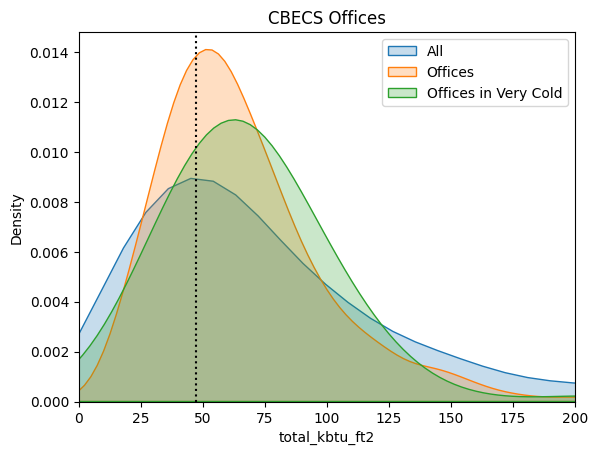

In [47]:
# calculate the total kbtu/ft2 for each building
cbecs2018["total_kbtu_ft2"] = cbecs2018["MFBTU"] / cbecs2018["SQFT"]

# create the kde plot of all kbtu/ft2
sns.kdeplot(cbecs2018["total_kbtu_ft2"], fill=True)

# filter only offices
offices = cbecs2018[cbecs2018["PBA"] == 2]
sns.kdeplot(offices["total_kbtu_ft2"], fill=True)

# only offices in very cold
offices_very_cold = offices[offices["PUBCLIM"] == 1]
sns.kdeplot(offices_very_cold["total_kbtu_ft2"], fill=True)
# add legend
plt.legend(["All", "Offices", "Offices in Very Cold"])
plt.xlim(0, 200)
plt.title("CBECS Offices")


# 1st quartile of the offices_very_cold
offices_very_cold_1st_quartile = offices_very_cold["total_kbtu_ft2"].quantile(0.25)
# plot as line
plt.axvline(offices_very_cold_1st_quartile, color="black", linestyle=":")

# ESPM Colorado Site EUI
https://portfoliomanager.energystar.gov/dataExplorer/?_gl=1*1cjut0r*_ga*NzE4OTQ5MDM4LjE3MjM1ODY2NzY.*_ga_S0KJTVVLQ6*MTcyMzU4NjY3Ni4xLjAuMTcyMzU4NjY3Ni4wLjAuMA..

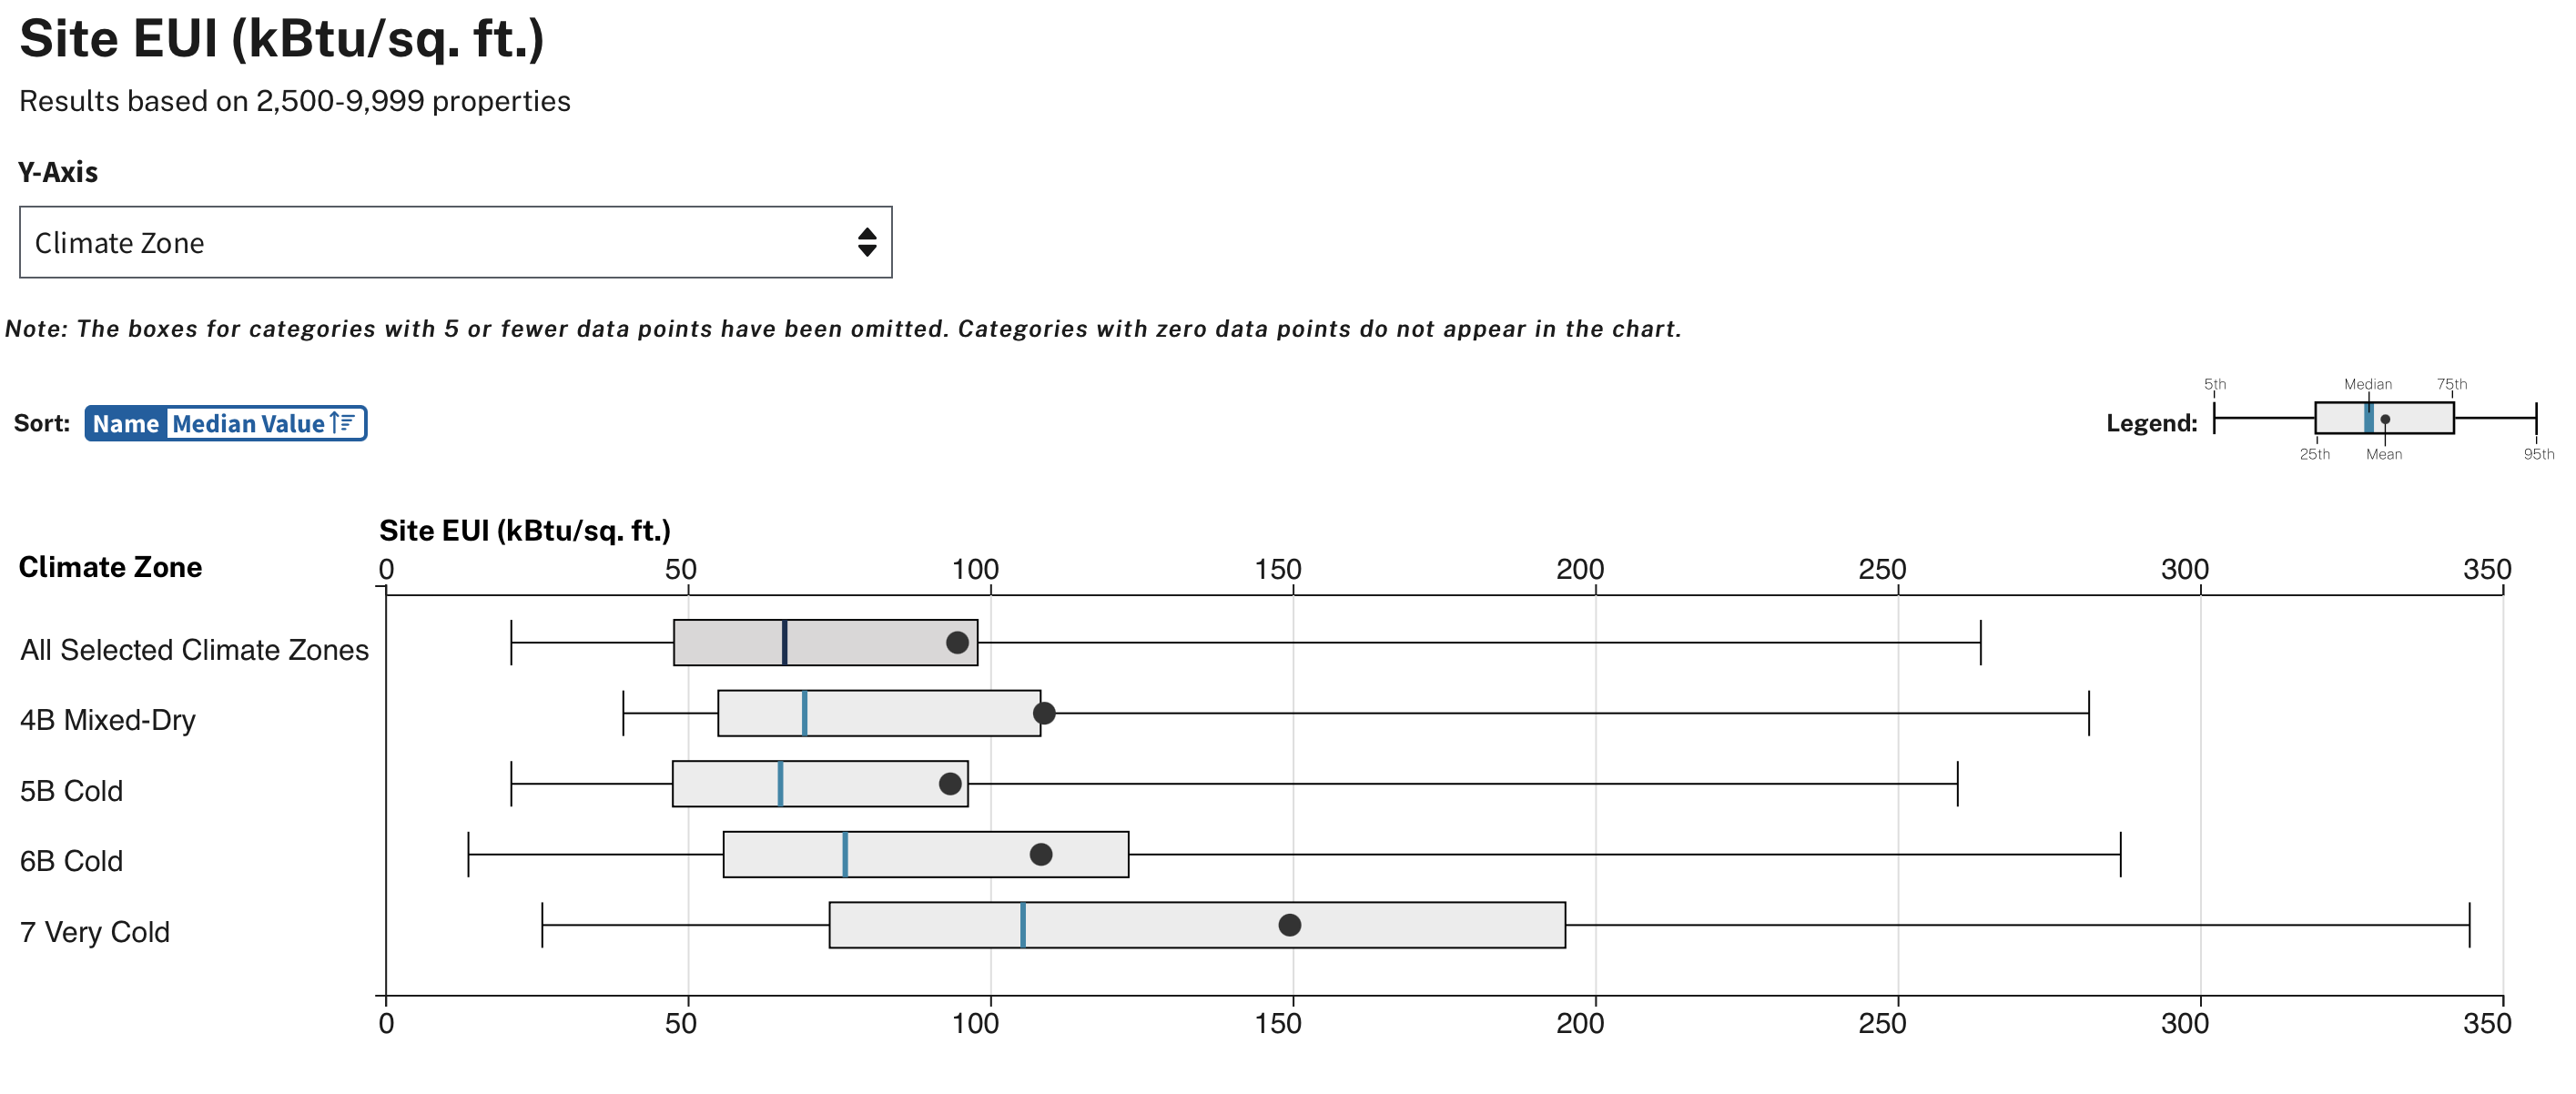


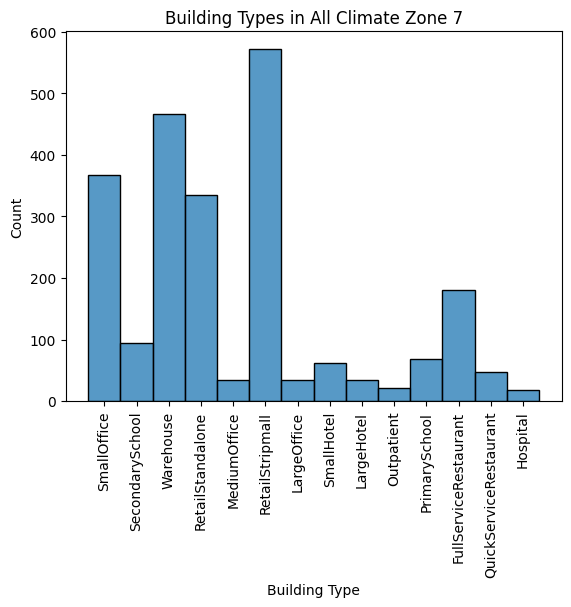

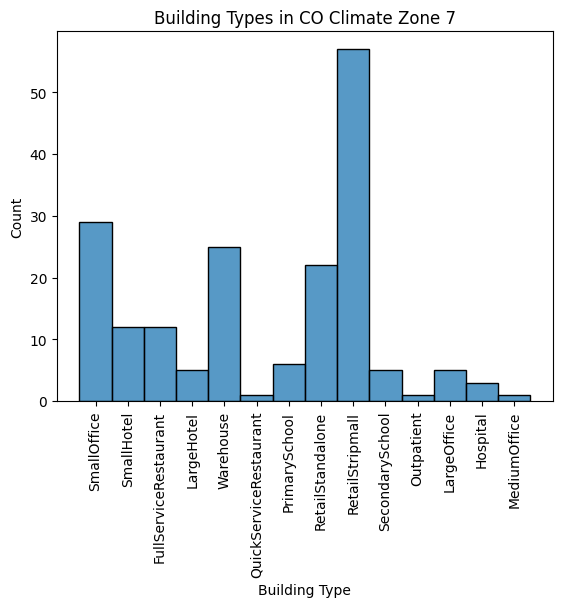

In [48]:
# show histogram of the building types - in.comstock_building_type

# It would be nice to have this image for each of the data sources
sns.histplot(df_cz7["in.comstock_building_type"])
plt.xlabel("Building Type")
plt.title("Building Types in All Climate Zone 7")
plt.xticks(rotation=90)
plt.show()

# show histogram of the building types - in.comstock_building_type
sns.histplot(df_co_cz7["in.comstock_building_type"])
plt.xlabel("Building Type")
plt.title("Building Types in CO Climate Zone 7")
plt.xticks(rotation=90)
plt.show()

# Data Comparison

In [49]:
# Read in std data
std100_25th_percentile = pd.read_excel(
    dataset_path / "std100" / "std100data_percentiles_allclimatezones_allbuildingtypes.xlsx", sheet_name="25thPercentile"
)
std100_40th_percentile = pd.read_excel(
    dataset_path / "std100" / "std100data_percentiles_allclimatezones_allbuildingtypes.xlsx", sheet_name="40thPercentile"
)
std100_50th_percentile = pd.read_excel(
    dataset_path / "std100" / "std100data_percentiles_allclimatezones_allbuildingtypes.xlsx", sheet_name="50thPercentile"
)

# display(std25thPercentile)

# Read in ESPM data
espm_data = pd.read_excel(dataset_path / "espm" / "ESPM_AllBuildingTypes_AllClimateZones_AllPercentiles.xlsx", sheet_name="Report")

# display(espm_data)

In [50]:
def all_buildings_figure(
    cbecs_climate_zone, comstock_climate_zone, espm_climate_zone, std_climate_zone, climate_zone_descriptor, cbecs_footnote_text
):
    # CBECS Data Handling:
    #   calculate the total kbtu/ft2 for each building
    #   add in literal column for data_source for union and display in visualization
    #   Filter to climate zone (See lookups.py or climate_zone_crosswalk.xlsx in the cbecs data folder for additional definitions for different numbers, not the same as climate zone numbers)
    #   Select data needed for union and visualization
    #   Note if needed: PBA is building type
    cbecs2018["EUI _kBTUft2"] = cbecs2018["MFBTU"] / cbecs2018["SQFT"]
    cbecs2018["data_source"] = "CBECS"
    cbecs2018["PUBCLIM"] = cbecs_climate_zone
    cbecs2018_for_union = cbecs2018[["data_source", "EUI _kBTUft2"]]

    # Comstock Data Handling:
    #   convert ComStock KWh to KBtu
    #   Filter just to climate zone
    #   add in literal column for data_source for union and display in visualization
    #   Select data needed for union and visualization
    #   Rename columns for union
    #   Note if needed: in.comstock_building_type is building type for comstock data;
    df_all["EUI _kBTUft2"] = df_all["out.site_energy.total.energy_consumption_intensity"] *  3.412
    comstock_cz = df_all[df_all["in.ashrae_iecc_climate_zone_2006"].str.contains(comstock_climate_zone)]
    comstock_cz["data_source"] = "ComStock"
    comstock_for_union = comstock_cz[["data_source", "EUI _kBTUft2"]]

    # ESPM Data Handling
    #   Filter just to climate zone
    espm_data_cz = espm_data[espm_data["ClimateZone"].str.contains(espm_climate_zone)]

    # Union CBECs and ComStock data for visualization
    union_df = pd.concat([cbecs2018_for_union, comstock_for_union], ignore_index=True)

    # Create box plot for unioned data
    sns.boxplot(data=union_df, x="EUI _kBTUft2", y="data_source")

    # layer in box plot for ESPM data (data in very different format so this step is required to get it to display correctly)
    sns.boxplot(
        data=[
            espm_data_cz["FifthPercentile"].mean(),
            espm_data_cz["TwentyFifthPercentile"].mean(),
            espm_data_cz["Median"].mean(),
            espm_data_cz["SeventyFifthPercentile"].mean(),
            espm_data_cz["NinetyFifthPercentile"].mean(),
        ],
        orient="h",
        color="tab:blue",
    )

    # Create percentile lines, averaged for all building types in zone
    std100_25th_percentile_mean = std100_25th_percentile[std_climate_zone].mean()
    std100_40th_percentile_mean = std100_40th_percentile[std_climate_zone].mean()
    std100_50th_percentile_mean = std100_50th_percentile[std_climate_zone].mean()

    plt.axvline(std100_25th_percentile_mean, color="gold", linestyle="--", linewidth=2, label="std100 25th Percentile")
    plt.axvline(std100_40th_percentile_mean, color="goldenrod", linestyle="--", linewidth=2, label="std100 40th Percentile")
    plt.axvline(std100_50th_percentile_mean, color="darkgoldenrod", linestyle="--", linewidth=2, label="std100 50th Percentile")

    plt.legend(bbox_to_anchor=(1.0, 1), loc="upper left")
    plt.xlabel("Site Energy EUI (kBtu/ft2)")
    plt.ylabel("Data Source")

    plt.title(f"Comparison of Climate Zone {espm_climate_zone} {climate_zone_descriptor} Standards for All Building Types", wrap=True)
    plt.xlim(0, 250)

    # Create label for ESPM data
    text_kwargs = {"ha": "right", "va": "baseline", "fontsize": 10, "color": "black"}
    plt.text(-4, 2.04, "ESPM", **text_kwargs)

    # Create footnote key for ESPM data
    text_kwargs = {"ha": "right", "va": "baseline", "fontsize": 10, "color": "black"}
    plt.text(-2.25, -0.01, "*", **text_kwargs)

    # Create note about climate zones in CBECs data
    text_kwargs = {"ha": "left", "va": "bottom", "fontsize": 10, "color": "black", "wrap": True}
    plt.text(255, 2, cbecs_footnote_text, **text_kwargs)

    # Save figure
    plt.subplots_adjust(right=0.7)
    plt.savefig(f"{figures_path}/all_buildings_cz{espm_climate_zone}.png", bbox_inches="tight")

In [51]:
def retail_and_office_buildings_figure(
    cbecs_climate_zone, comstock_climate_zone, espm_climate_zone, std_climate_zone, climate_zone_descriptor, cbecs_footnote_text
):
    # CBECS Data Handling:
    #   Filter to retail and office building types
    #       Note: Only included "2 - Office" and "25 - Retail other than mall"; did not include "23 - Strip shopping center" or "24 - Enclosed mall"
    #   calculate the total kbtu/ft2 for each building
    #   add in literal column for data_source for union
    #   Filter to climate zone (See lookups.py or climate_zone_crosswalk.xlsx in the cbecs data folder for additional definitions for different numbers, not the same as climate zone numbers)
    #   Select data needed for union and visualization
    cbecs2018_office_and_retail = cbecs2018[cbecs2018["PBA"].isin([2, 25])]
    cbecs2018_office_and_retail["EUI _kBTUft2"] = cbecs2018_office_and_retail["MFBTU"] / cbecs2018_office_and_retail["SQFT"]
    cbecs2018_office_and_retail["data_source"] = "CBECS"
    cbecs2018_office_and_retail["PUBCLIM"] = cbecs_climate_zone
    cbecs2018_office_and_retail_for_union = cbecs2018_office_and_retail[["data_source", "EUI _kBTUft2"]]

    # Comstock Data Handling:
    #   convert ComStock KWh to KBtu
    #   Filter to retail and office building types
    #       Note: did not include RetailStripMall
    #   Filter to climate zone
    #   add in literal column for data_source for union and display in visualization
    #   Select data needed for union and visualization
    #   Rename columns for union
    df_all["EUI _kBTUft2"] = df_all["out.site_energy.total.energy_consumption_intensity"] *  3.412

    comstock_office_and_retail = df_all[
        df_all["in.comstock_building_type"].isin(["LargeOffice", "SmallOffice", "RetailStandalone", "MediumOffice"])
    ]
    comstock_office_and_retail_cz = comstock_office_and_retail[
        comstock_office_and_retail["in.ashrae_iecc_climate_zone_2006"].str.contains(comstock_climate_zone)
    ]
    comstock_office_and_retail_cz["data_source"] = "ComStock"
    comstock_office_and_retail_cz_for_union = comstock_office_and_retail_cz[
        ["data_source", "EUI _kBTUft2"]
    ]


    # ESPM Data Handling
    #   Filter to retail and office building types
    #       Note: did not include "Mailing Center/Post Office", "Medical Office", or "Veterinary Office"
    #   Filter to climate zone
    espm_data_office_and_retail = espm_data[
        espm_data["PropertyTypeSubcategory"].isin(["Other - Retail/Mall", "Retail Store", "Financial Office", "Office"])
    ]
    espm_data_office_and_retail = espm_data_office_and_retail[espm_data_office_and_retail["ClimateZone"].str.contains(espm_climate_zone)]

    # Union CBECs and ComStock data for visualization
    union_df_office_and_retail = pd.concat(
        [cbecs2018_office_and_retail_for_union, comstock_office_and_retail_cz_for_union],
        ignore_index=True,
    )

    # Create box plot for unioned data
    sns.boxplot(data=union_df_office_and_retail, x="EUI _kBTUft2", y="data_source")

    # layer in box plot for ESPM data (data in very different format so this step is required to get it to display correctly)
    sns.boxplot(
        data=[
            espm_data_office_and_retail["FifthPercentile"].mean(),
            espm_data_office_and_retail["TwentyFifthPercentile"].mean(),
            espm_data_office_and_retail["Median"].mean(),
            espm_data_office_and_retail["SeventyFifthPercentile"].mean(),
            espm_data_office_and_retail["NinetyFifthPercentile"].mean(),
        ],
        orient="h",
        color="tab:blue",
    )

    # Create percentile lines, averaged for all building types in zone
    # Filter to retail and office building types
    #   Note: Did not include "Medical office (nondiagnostic)", "Medical office (diagnostic)","Post office/postal center", "Courthouse/probation office","Enclosed mall", or "Strip shopping mall"
    std100_25th_percentile_office_and_retail = std100_25th_percentile[
        std100_25th_percentile["Commercial Building Type"].isin(
            ["Other retail", "Retail store", "Admin/professional office", "Government office", "Mixed-use office", "Other office"]
        )
    ]
    std100_25th_percentile_mean_office_and_retail = std100_25th_percentile_office_and_retail[std_climate_zone].mean()

    std100_40th_percentile_office_and_retail = std100_40th_percentile[
        std100_40th_percentile["Commercial Building Type"].isin(
            ["Other retail", "Retail store", "Admin/professional office", "Government office", "Mixed-use office", "Other office"]
        )
    ]
    std100_40th_percentile_mean_office_and_retail = std100_40th_percentile_office_and_retail[std_climate_zone].mean()

    std100_50th_percentile_office_and_retail = std100_50th_percentile[
        std100_50th_percentile["Commercial Building Type"].isin(
            ["Other retail", "Retail store", "Admin/professional office", "Government office", "Mixed-use office", "Other office"]
        )
    ]
    std100_50th_percentile_mean_office_and_retail = std100_50th_percentile_office_and_retail[std_climate_zone].mean()

    plt.axvline(std100_25th_percentile_mean_office_and_retail, color="gold", linestyle="--", label="std100 25th Percentile")
    plt.axvline(std100_40th_percentile_mean_office_and_retail, color="goldenrod", linestyle="--", label="std100 40th Percentile")
    plt.axvline(std100_50th_percentile_mean_office_and_retail, color="darkgoldenrod", linestyle="--", label="std100 50th Percentile")
    plt.legend(bbox_to_anchor=(1.0, 1), loc="upper left")
    plt.xlabel("Site Energy EUI (kBtu/ft2)")
    plt.ylabel("Data Source")
    plt.title(
        f"Comparison of Climate Zone {espm_climate_zone} {climate_zone_descriptor} Standards for Retail and Office Building Types",
        wrap=True,
    )
    plt.xlim(0, 250)

    # Create label for ESPM data
    text_kwargs = {"ha": "right", "va": "baseline", "fontsize": 10, "color": "black"}
    plt.text(-4, 2.04, "ESPM", **text_kwargs)

    # Create footnote key for ESPM data
    text_kwargs = {"ha": "right", "va": "baseline", "fontsize": 10, "color": "black"}
    plt.text(-2.25, -0.01, "*", **text_kwargs)

    # Create note about climate zones in CBECs data
    text_kwargs = {"ha": "left", "va": "bottom", "fontsize": 10, "color": "black", "wrap": True}
    plt.text(255, 2, cbecs_footnote_text, **text_kwargs)

    # Save figure
    plt.subplots_adjust(right=0.7)
    plt.savefig(f"{figures_path}/office_and_retail_buildings_cz{espm_climate_zone}.png", bbox_inches="tight")

In [52]:
def all_buildings_percentile_comparisons(
    cbecs_climate_zone, comstock_climate_zone, espm_climate_zone, std_climate_zone, climate_zone_descriptor
):
    # CBECS Data Handling:
    #   calculate the total kbtu/ft2 for each building
    #   add in literal column for data_source for union and display in visualization
    #   Filter to climate zone (See lookups.py or climate_zone_crosswalk.xlsx in the cbecs data folder for additional definitions for different numbers, not the same as climate zone numbers)
    #   Select data needed for union and visualization
    #   Note if needed: PBA is building type
    cbecs2018["EUI _kBTUft2"] = cbecs2018["MFBTU"] / cbecs2018["SQFT"]
    cbecs2018["data_source"] = "CBECS"
    cbecs2018["PUBCLIM"] = cbecs_climate_zone
    cbecs2018_for_union = cbecs2018[["data_source", "EUI _kBTUft2"]]

    # Comstock Data Handling:
    #   convert ComStock KWh to KBtu
    #   Filter just to climate zone
    #   add in literal column for data_source for union and display in visualization
    #   Select data needed for union and visualization
    #   Rename columns for union
    #   Note if needed: in.comstock_building_type is building type for comstock data;
    df_all["EUI _kBTUft2"] = df_all["out.site_energy.total.energy_consumption_intensity"] *  3.412
    comstock_cz = df_all[df_all["in.ashrae_iecc_climate_zone_2006"].str.contains(comstock_climate_zone)]
    comstock_cz["data_source"] = "ComStock"
    comstock_for_union = comstock_cz[["data_source", "EUI _kBTUft2"]]

    # ESPM Data Handling
    #   Filter just to climate zone
    espm_data_cz = espm_data[espm_data["ClimateZone"].str.contains(espm_climate_zone)]


    #-----------------------------------------------------------------
    # std100
    #-----------------------------------------------------------------
    std100_25th_percentile['percentile'] = 'std100_Percentile_25'
    std100_25th_percentile_means = std100_25th_percentile.groupby('percentile')[std_climate_zone].mean().reset_index()
    std100_25th_percentile_means.index = ['std100_Percentile_25']
    std100_25th_percentile_means = std100_25th_percentile_means.rename(columns={std_climate_zone: "EUI _kBTUft2"})
    std100_25th_percentile_means = std100_25th_percentile_means.drop(columns=['percentile'])

    std100_40th_percentile['percentile'] = 'std100_Percentile_40'
    std100_40th_percentile_means = std100_40th_percentile.groupby('percentile')[std_climate_zone].mean().reset_index()
    std100_40th_percentile_means.index = ['std100_Percentile_40']
    std100_40th_percentile_means = std100_40th_percentile_means.rename(columns={std_climate_zone: "EUI _kBTUft2"})
    std100_40th_percentile_means = std100_40th_percentile_means.drop(columns=['percentile'])

    std100_50th_percentile['percentile'] = 'std100_Percentile_50'
    std100_50th_percentile_means = std100_50th_percentile.groupby('percentile')[std_climate_zone].mean().reset_index()
    std100_50th_percentile_means.index = ['std100_Percentile_50']
    std100_50th_percentile_means = std100_50th_percentile_means.rename(columns={std_climate_zone: "EUI _kBTUft2"})
    std100_50th_percentile_means = std100_50th_percentile_means.drop(columns=['percentile'])

    #-----------------------------------------------------------------
    # ESPM - Note the ESPM data export does not have a 40th percentile
    #-----------------------------------------------------------------

    espm_data_cz_25th_percentile_means = espm_data_cz.groupby('ClimateZone')['TwentyFifthPercentile'].mean().reset_index()
    espm_data_cz_25th_percentile_means.index = ['ESPM_Percentile_25']
    espm_data_cz_25th_percentile_means = espm_data_cz_25th_percentile_means.rename(columns={'TwentyFifthPercentile': "EUI _kBTUft2"})
    espm_data_cz_25th_percentile_means = espm_data_cz_25th_percentile_means.drop(columns=['ClimateZone'])

    espm_data_cz_50th_percentile_means = espm_data_cz.groupby('ClimateZone')['Median'].mean().reset_index()
    espm_data_cz_50th_percentile_means.index = ['ESPM_Percentile_50']
    espm_data_cz_50th_percentile_means = espm_data_cz_50th_percentile_means.rename(columns={'Median': "EUI _kBTUft2"})
    espm_data_cz_50th_percentile_means = espm_data_cz_50th_percentile_means.drop(columns=['ClimateZone'])

    display(espm_data_cz_25th_percentile_means)
    #-----------------------------------------------------------------
    # CBECS
    #-----------------------------------------------------------------

    percentiles_cbecs = cbecs2018_for_union["EUI _kBTUft2"].quantile([0.25, 0.4, 0.5])
    percentiles_cbecs = percentiles_cbecs.T
    percentiles_cbecs.index = ['CBECS_Percentile_25', 'CBECS_Percentile_40', 'CBECS_Percentile_50']

    #-----------------------------------------------------------------
    # ComStock
    #-----------------------------------------------------------------

    percentiles_comstock = comstock_for_union["EUI _kBTUft2"].quantile([0.25, 0.4, 0.5])
    percentiles_comstock = percentiles_comstock.T
    percentiles_comstock.index = ['ComStock_Percentile_25', 'ComStock_Percentile_40', 'ComStock_Percentile_50']


    #-----------------------------------------------------------------
    # Data merge steps
    #-----------------------------------------------------------------

    percentiles_union = pd.concat([percentiles_cbecs, percentiles_comstock, std100_25th_percentile_means, std100_40th_percentile_means, std100_50th_percentile_means, espm_data_cz_25th_percentile_means, espm_data_cz_50th_percentile_means], ignore_index=False)

    percentiles_union = percentiles_union.reset_index()

    percentiles_union = percentiles_union.rename(columns= {"index": "PercentileType"})


    #-----------------------------------------------------------------
    # Calculate percent differences, 25th percentiles
    #-----------------------------------------------------------------
    percentile_comparison_25 = percentiles_union[percentiles_union.PercentileType.isin(['CBECS_Percentile_25', 'ComStock_Percentile_25', 'std100_Percentile_25', 'ESPM_Percentile_25'])]

    var = percentile_comparison_25['EUI _kBTUft2'].values
    arr = ((var - var[:, None])/var)*-100
    percentile_comparison_25_matrix = pd.DataFrame(arr, columns=percentile_comparison_25['PercentileType'], index=percentile_comparison_25['PercentileType'])

    #-----------------------------------------------------------------
    # Calculate percent differences, 50th percentiles
    #-----------------------------------------------------------------
    percentile_comparison_50 = percentiles_union[percentiles_union.PercentileType.isin(['CBECS_Percentile_50', 'ComStock_Percentile_50', 'std100_Percentile_50', 'ESPM_Percentile_50'])]

    var = percentile_comparison_50['EUI _kBTUft2'].values
    arr = ((var - var[:, None])/var)*-100
    percentile_comparison_50_matrix = pd.DataFrame(arr, columns=percentile_comparison_50['PercentileType'], index=percentile_comparison_50['PercentileType'])
    
    #-----------------------------------------------------------------
    # Define a function for highlighting cells
    #-----------------------------------------------------------------

    def highlight_cells(val):
        color = '#F1959B' if 20 < val < 40 else '#F07470' if 40 < val < 60 else '#EA4C46' if 60 < val < 80 else '#DC1C13' if 80 < val else '#F1959B' if -20 > val > -40 else '#F07470' if -40 > val > -60 else '#EA4C46' if -60 > val > -80 else '#DC1C13' if -80 > val else ''
        return f'background-color: {color}'

    percentile_comparison_25_matrix = percentile_comparison_25_matrix.style.applymap(highlight_cells).format("{:.2f}").set_caption(f"Comparison of Climate Zone {espm_climate_zone} {climate_zone_descriptor} Percentiles as Percent Difference")
    percentile_comparison_50_matrix = percentile_comparison_50_matrix.style.applymap(highlight_cells).format("{:.2f}").set_caption(f"Comparison of Climate Zone {espm_climate_zone} {climate_zone_descriptor} Percentiles as Percent Difference")

    display(percentile_comparison_25)
    display(percentile_comparison_25_matrix)
    display(percentile_comparison_50)
    display(percentile_comparison_50_matrix)


# Climate Zone 1A

In [53]:
# Define parameters for functions

cbecs_climate_zone = 5
comstock_climate_zone = "1A"
espm_climate_zone = "1A"
std_climate_zone = "1A"
climate_zone_descriptor = "(Hot-Humid)"
cbecs_footnote_text = "*CBECs data uses a grouping of Hot or Very Hot climate zones (1A, 1B, 2A, 2B)"

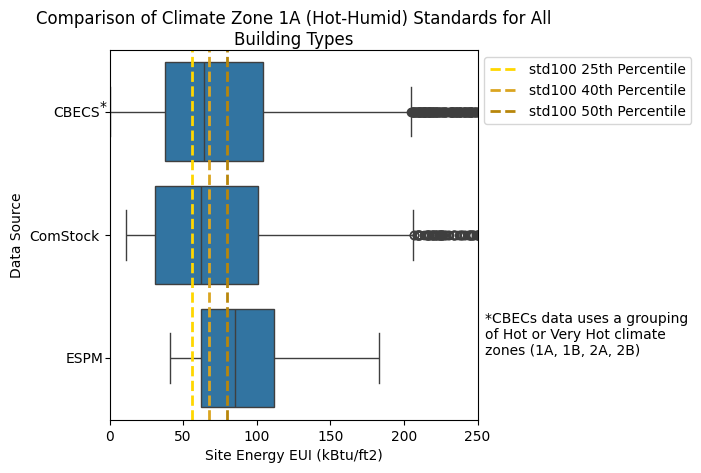

In [54]:
all_buildings_figure(
    cbecs_climate_zone, comstock_climate_zone, espm_climate_zone, std_climate_zone, climate_zone_descriptor, cbecs_footnote_text
)

In [55]:
all_buildings_percentile_comparisons(
    cbecs_climate_zone, comstock_climate_zone, espm_climate_zone, std_climate_zone, climate_zone_descriptor
)

EUI _kBTUft2
ESPM_Percentile_25     62.327778

PercentileType  EUI _kBTUft2
0     CBECS_Percentile_25     37.779646
3  ComStock_Percentile_25     30.774588
6    std100_Percentile_25     55.709091
9      ESPM_Percentile_25     62.327778

PercentileType  EUI _kBTUft2
2      CBECS_Percentile_50     64.182600
5   ComStock_Percentile_50     61.806169
8     std100_Percentile_50     79.527273
10      ESPM_Percentile_50     84.919444

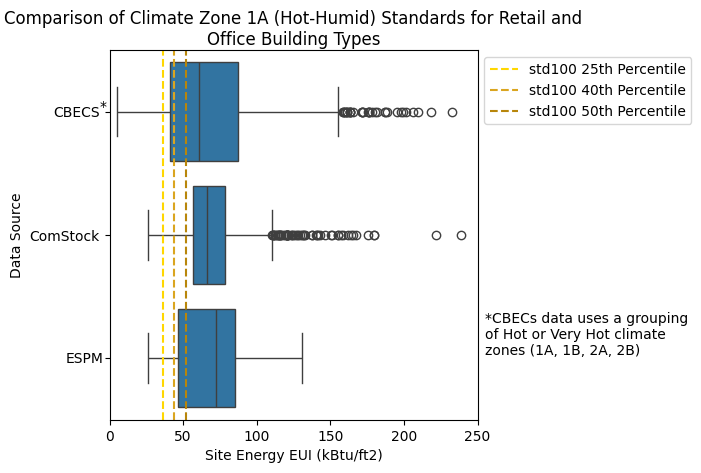

In [56]:
retail_and_office_buildings_figure(
    cbecs_climate_zone, comstock_climate_zone, espm_climate_zone, std_climate_zone, climate_zone_descriptor, cbecs_footnote_text
)

# Climate Zone 2A

In [57]:
# Define parameters for functions

cbecs_climate_zone = 5
comstock_climate_zone = "2A"
espm_climate_zone = "2A"
std_climate_zone = "2A"
climate_zone_descriptor = "(Hot-Humid)"
cbecs_footnote_text = "*CBECs data uses a grouping of Hot or Very Hot climate zones (1A, 1B, 2A, 2B)"

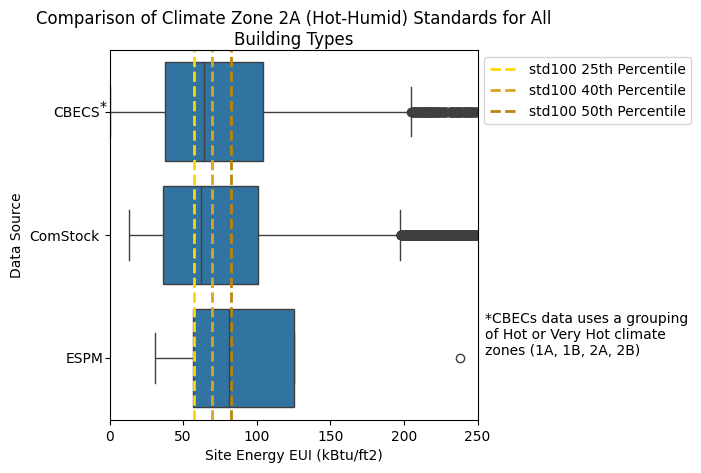

In [58]:
all_buildings_figure(
    cbecs_climate_zone, comstock_climate_zone, espm_climate_zone, std_climate_zone, climate_zone_descriptor, cbecs_footnote_text
)

In [59]:
all_buildings_percentile_comparisons(
    cbecs_climate_zone, comstock_climate_zone, espm_climate_zone, std_climate_zone, climate_zone_descriptor
)

EUI _kBTUft2
ESPM_Percentile_25     56.510345

PercentileType  EUI _kBTUft2
0     CBECS_Percentile_25     37.779646
3  ComStock_Percentile_25     36.429576
6    std100_Percentile_25     57.563636
9      ESPM_Percentile_25     56.510345

PercentileType  EUI _kBTUft2
2      CBECS_Percentile_50     64.182600
5   ComStock_Percentile_50     62.016575
8     std100_Percentile_50     82.236364
10      ESPM_Percentile_50     81.218966

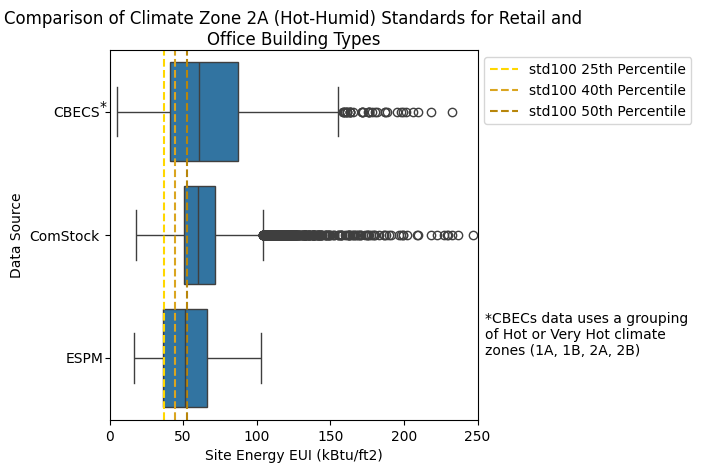

In [60]:
retail_and_office_buildings_figure(
    cbecs_climate_zone, comstock_climate_zone, espm_climate_zone, std_climate_zone, climate_zone_descriptor, cbecs_footnote_text
)

# Climate Zone 2B

In [61]:
# Define parameters for functions

cbecs_climate_zone = 5
comstock_climate_zone = "2B"
espm_climate_zone = "2B"
std_climate_zone = "2B"
climate_zone_descriptor = "(Hot-Dry / Hot-Humid)"
cbecs_footnote_text = "*CBECs data uses a grouping of Hot or Very Hot climate zones (1A, 1B, 2A, 2B)"

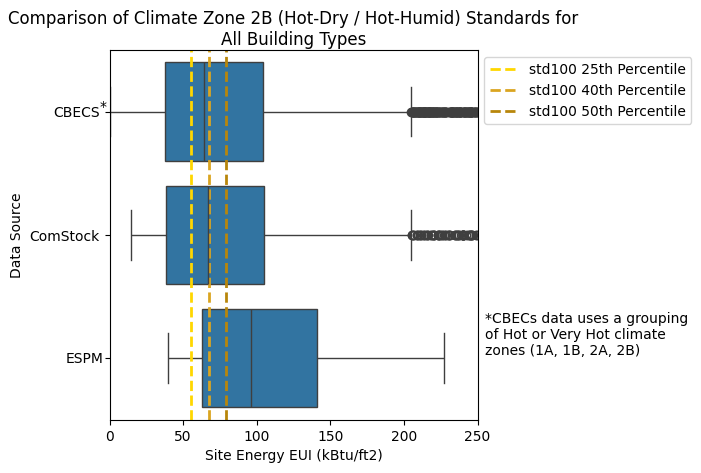

In [62]:
all_buildings_figure(
    cbecs_climate_zone, comstock_climate_zone, espm_climate_zone, std_climate_zone, climate_zone_descriptor, cbecs_footnote_text
)

In [ ]:
# Uncertain why this is failing since it is the same as everything else, commenting out for now, may need help investigating
#----------------------------------------------------------------------------------------------------------------------------
# all_buildings_percentile_comparisons(
#     cbecs_climate_zone, comstock_climate_zone, espm_climate_zone, std_climate_zone, climate_zone_descriptor
# )

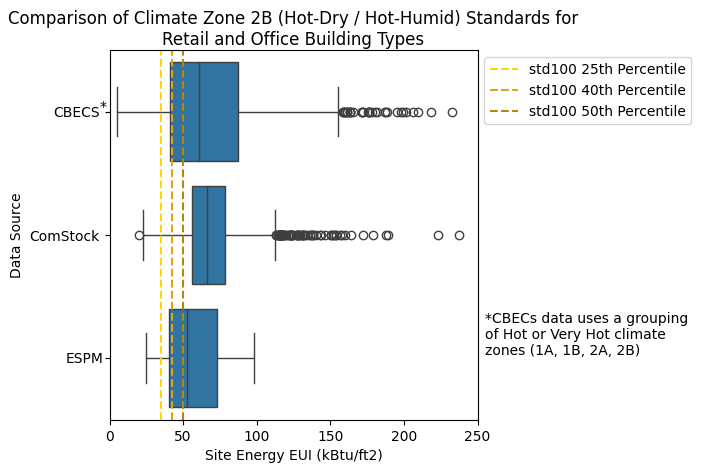

In [65]:
retail_and_office_buildings_figure(
    cbecs_climate_zone, comstock_climate_zone, espm_climate_zone, std_climate_zone, climate_zone_descriptor, cbecs_footnote_text
)

# Climate Zone 3A

In [66]:
# Define parameters for functions

cbecs_climate_zone = 4
comstock_climate_zone = "3A"
espm_climate_zone = "3A"
std_climate_zone = "3A"
climate_zone_descriptor = "(Hot-Humid / Mixed Humid)"
cbecs_footnote_text = "*CBECs data uses a grouping of Warm climate zones (3A, 3B, 3C)"

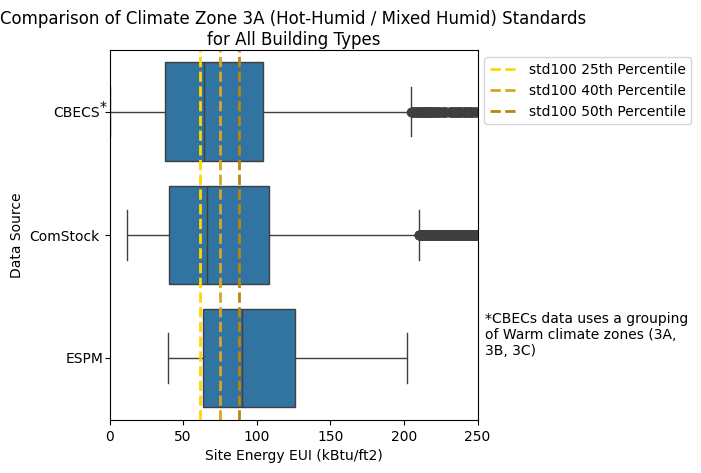

In [67]:
all_buildings_figure(
    cbecs_climate_zone, comstock_climate_zone, espm_climate_zone, std_climate_zone, climate_zone_descriptor, cbecs_footnote_text
)

In [ ]:
# Uncertain why this is failing since it is the same as everything else, commenting out for now, may need help investigating
#----------------------------------------------------------------------------------------------------------------------------
# all_buildings_percentile_comparisons(
#     cbecs_climate_zone, comstock_climate_zone, espm_climate_zone, std_climate_zone, climate_zone_descriptor
# )

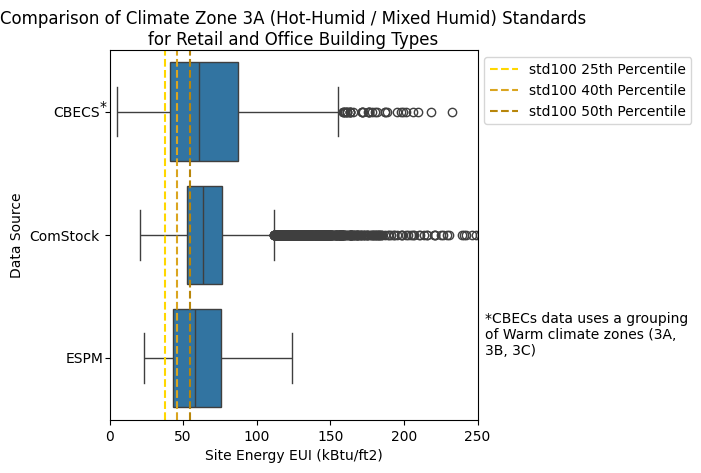

In [70]:
retail_and_office_buildings_figure(
    cbecs_climate_zone, comstock_climate_zone, espm_climate_zone, std_climate_zone, climate_zone_descriptor, cbecs_footnote_text
)

# Climate Zone 3B

In [71]:
# Define parameters for functions

cbecs_climate_zone = 4
comstock_climate_zone = "3B"
espm_climate_zone = "3B"
std_climate_zone = "3B Other"
climate_zone_descriptor = "(Hot-Humid)"
cbecs_footnote_text = "*CBECs data uses a grouping of Warm climate zones (3A, 3B, 3C)"

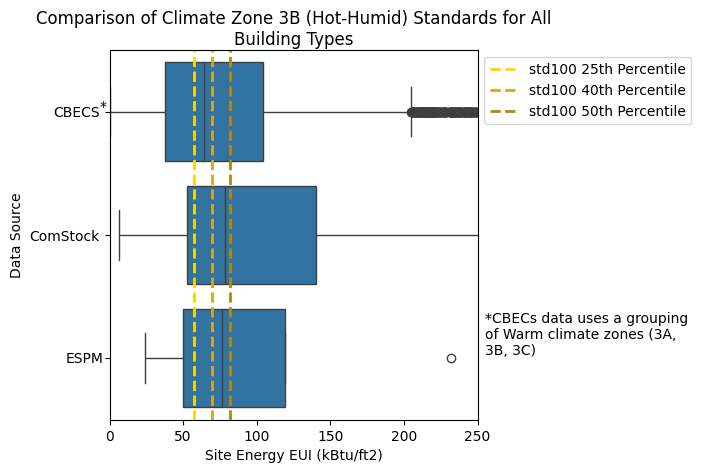

In [72]:
all_buildings_figure(
    cbecs_climate_zone, comstock_climate_zone, espm_climate_zone, std_climate_zone, climate_zone_descriptor, cbecs_footnote_text
)

In [73]:
all_buildings_percentile_comparisons(
    cbecs_climate_zone, comstock_climate_zone, espm_climate_zone, std_climate_zone, climate_zone_descriptor
)

EUI _kBTUft2
ESPM_Percentile_25     49.937313

PercentileType  EUI _kBTUft2
0     CBECS_Percentile_25     37.779646
3  ComStock_Percentile_25     52.576889
6    std100_Percentile_25     57.400000
9      ESPM_Percentile_25     49.937313

PercentileType  EUI _kBTUft2
2      CBECS_Percentile_50     64.182600
5   ComStock_Percentile_50     78.153756
8     std100_Percentile_50     81.945455
10      ESPM_Percentile_50     76.102985

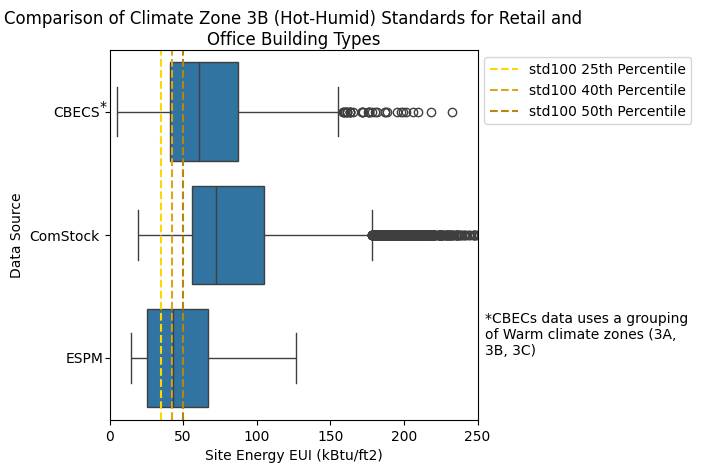

In [74]:
retail_and_office_buildings_figure(
    cbecs_climate_zone, comstock_climate_zone, espm_climate_zone, std_climate_zone, climate_zone_descriptor, cbecs_footnote_text
)

# Climate Zone 3C

In [75]:
# Define parameters for functions

cbecs_climate_zone = 4
comstock_climate_zone = "3C"
espm_climate_zone = "3C"
std_climate_zone = "3C"
climate_zone_descriptor = "(Marine)"
cbecs_footnote_text = "*CBECs data uses a grouping of Warm climate zones (3A, 3B, 3C)"

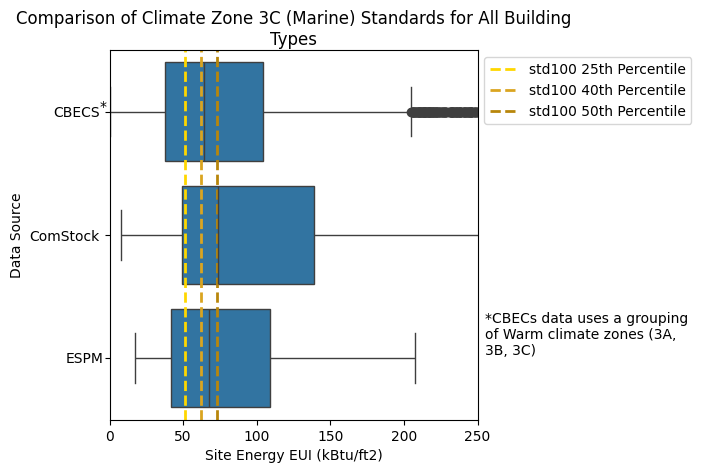

In [76]:
all_buildings_figure(
    cbecs_climate_zone, comstock_climate_zone, espm_climate_zone, std_climate_zone, climate_zone_descriptor, cbecs_footnote_text
)

In [77]:
all_buildings_percentile_comparisons(
    cbecs_climate_zone, comstock_climate_zone, espm_climate_zone, std_climate_zone, climate_zone_descriptor
)

EUI _kBTUft2
ESPM_Percentile_25     41.539655

PercentileType  EUI _kBTUft2
0     CBECS_Percentile_25     37.779646
3  ComStock_Percentile_25     49.307755
6    std100_Percentile_25     51.290909
9      ESPM_Percentile_25     41.539655

PercentileType  EUI _kBTUft2
2      CBECS_Percentile_50     64.182600
5   ComStock_Percentile_50     73.492079
8     std100_Percentile_50     73.345455
10      ESPM_Percentile_50     67.563793

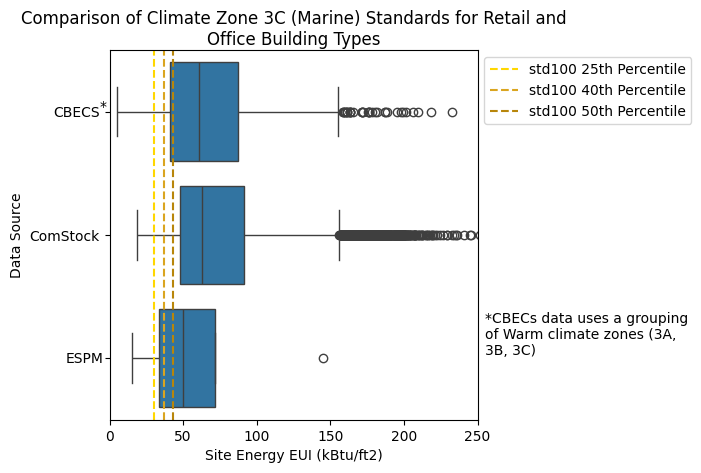

In [78]:
retail_and_office_buildings_figure(
    cbecs_climate_zone, comstock_climate_zone, espm_climate_zone, std_climate_zone, climate_zone_descriptor, cbecs_footnote_text
)

# Climate Zone 4A

In [79]:
# Define parameters for functions

cbecs_climate_zone = 3
comstock_climate_zone = "4A"
espm_climate_zone = "4A"
std_climate_zone = "4A"
climate_zone_descriptor = "(Mixed-Humid)"
cbecs_footnote_text = "*CBECs data uses a grouping of Mixed Mild climate zones (4A, 4B, 4C)"

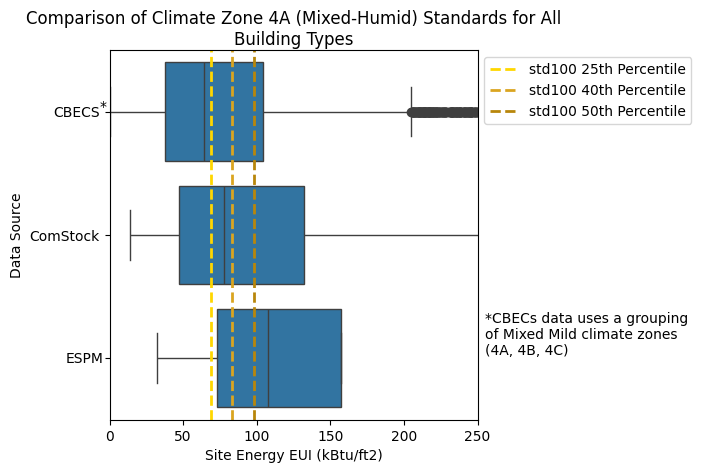

In [80]:
all_buildings_figure(
    cbecs_climate_zone, comstock_climate_zone, espm_climate_zone, std_climate_zone, climate_zone_descriptor, cbecs_footnote_text
)

In [81]:
all_buildings_percentile_comparisons(
    cbecs_climate_zone, comstock_climate_zone, espm_climate_zone, std_climate_zone, climate_zone_descriptor
)

EUI _kBTUft2
ESPM_Percentile_25     73.202703

PercentileType  EUI _kBTUft2
0     CBECS_Percentile_25     37.779646
3  ComStock_Percentile_25     47.203409
6    std100_Percentile_25     68.690909
9      ESPM_Percentile_25     73.202703

PercentileType  EUI _kBTUft2
2      CBECS_Percentile_50     64.182600
5   ComStock_Percentile_50     78.026293
8     std100_Percentile_50     98.163636
10      ESPM_Percentile_50    107.978378

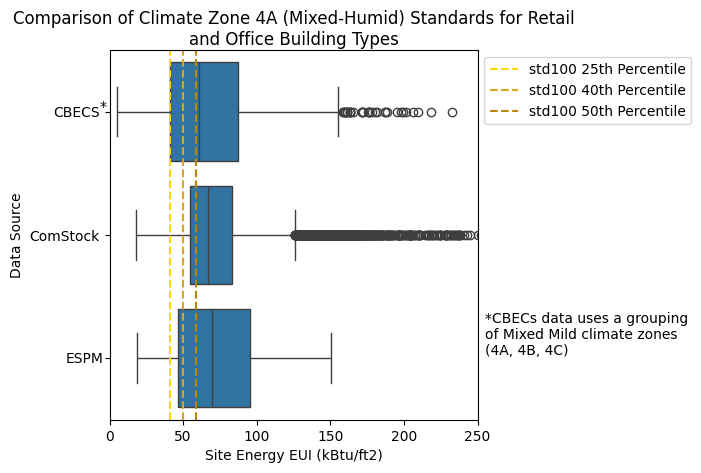

In [82]:
retail_and_office_buildings_figure(
    cbecs_climate_zone, comstock_climate_zone, espm_climate_zone, std_climate_zone, climate_zone_descriptor, cbecs_footnote_text
)

# Climate Zone 4B

In [83]:
# Define parameters for functions

cbecs_climate_zone = 3
comstock_climate_zone = "4B"
espm_climate_zone = "4B"
std_climate_zone = "4B"
climate_zone_descriptor = "(Mixed-Dry)"
cbecs_footnote_text = "*CBECs data uses a grouping of Mixed Mild climate zones (4A, 4B, 4C)"

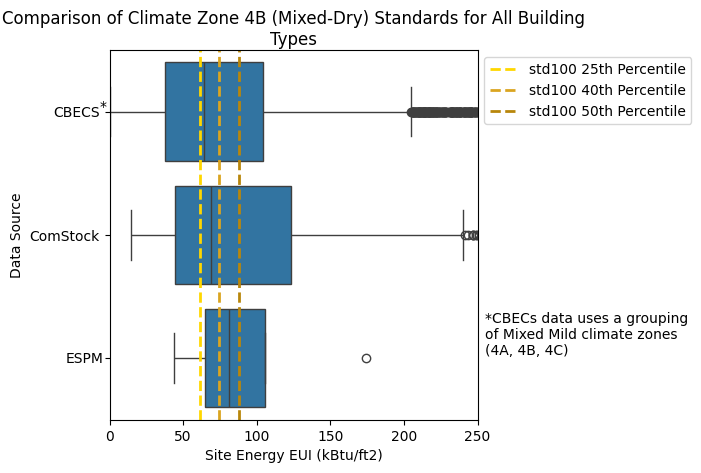

In [84]:
all_buildings_figure(
    cbecs_climate_zone, comstock_climate_zone, espm_climate_zone, std_climate_zone, climate_zone_descriptor, cbecs_footnote_text
)

In [85]:
all_buildings_percentile_comparisons(
    cbecs_climate_zone, comstock_climate_zone, espm_climate_zone, std_climate_zone, climate_zone_descriptor
)

EUI _kBTUft2
ESPM_Percentile_25     64.908696

PercentileType  EUI _kBTUft2
0     CBECS_Percentile_25     37.779646
3  ComStock_Percentile_25     44.538289
6    std100_Percentile_25     61.272727
9      ESPM_Percentile_25     64.908696

PercentileType  EUI _kBTUft2
2      CBECS_Percentile_50     64.182600
5   ComStock_Percentile_50     69.133917
8     std100_Percentile_50     87.618182
10      ESPM_Percentile_50     81.204348

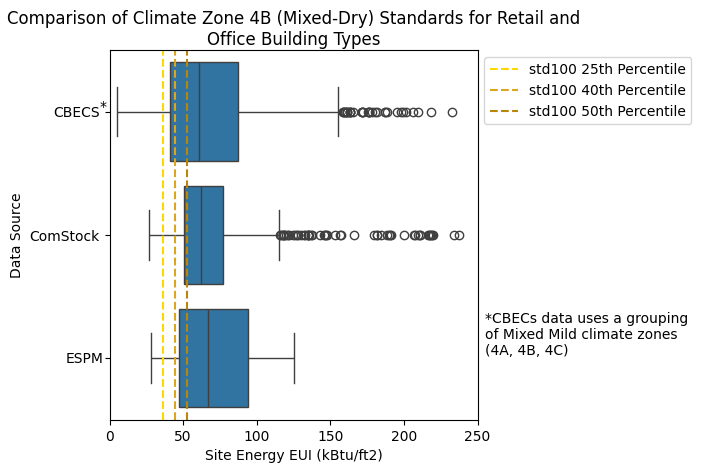

In [86]:
retail_and_office_buildings_figure(
    cbecs_climate_zone, comstock_climate_zone, espm_climate_zone, std_climate_zone, climate_zone_descriptor, cbecs_footnote_text
)

# Climate Zone 4C

In [87]:
# Define parameters for functions

cbecs_climate_zone = 3
comstock_climate_zone = "4C"
espm_climate_zone = "4C"
std_climate_zone = "4C"
climate_zone_descriptor = "(Marine)"
cbecs_footnote_text = "*CBECs data uses a grouping of Mixed Mild climate zones (4A, 4B, 4C)"

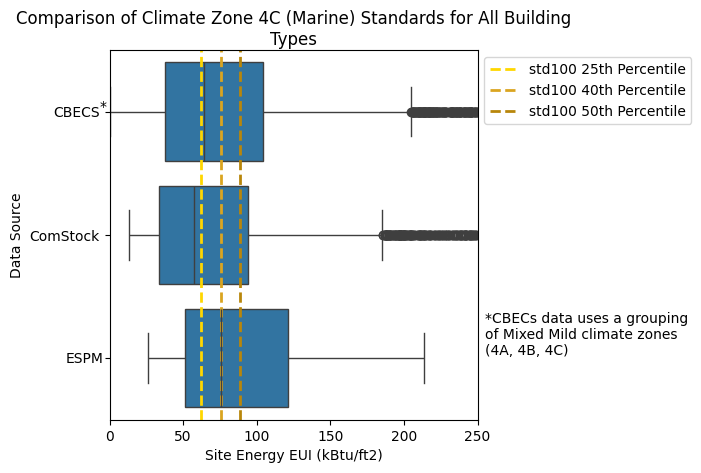

In [88]:
all_buildings_figure(
    cbecs_climate_zone, comstock_climate_zone, espm_climate_zone, std_climate_zone, climate_zone_descriptor, cbecs_footnote_text
)

In [89]:
all_buildings_percentile_comparisons(
    cbecs_climate_zone, comstock_climate_zone, espm_climate_zone, std_climate_zone, climate_zone_descriptor
)

EUI _kBTUft2
ESPM_Percentile_25     51.163934

PercentileType  EUI _kBTUft2
0     CBECS_Percentile_25     37.779646
3  ComStock_Percentile_25     33.655806
6    std100_Percentile_25     62.381818
9      ESPM_Percentile_25     51.163934

PercentileType  EUI _kBTUft2
2      CBECS_Percentile_50     64.182600
5   ComStock_Percentile_50     57.637842
8     std100_Percentile_50     88.945455
10      ESPM_Percentile_50     75.937705

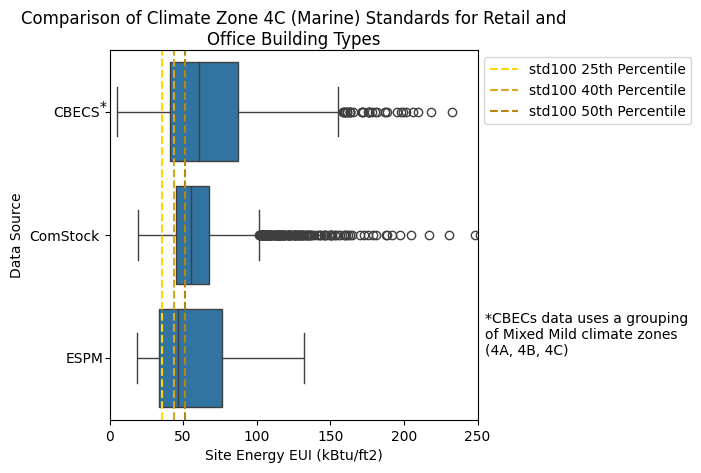

In [90]:
retail_and_office_buildings_figure(
    cbecs_climate_zone, comstock_climate_zone, espm_climate_zone, std_climate_zone, climate_zone_descriptor, cbecs_footnote_text
)

# Climate Zone 5A

In [91]:
# Define parameters for functions

cbecs_climate_zone = 2
comstock_climate_zone = "5A"
espm_climate_zone = "5A"
std_climate_zone = "5A"
climate_zone_descriptor = "(Cold)"
cbecs_footnote_text = "*CBECs data uses a grouping of Cool climate zones (5A, 5B)"

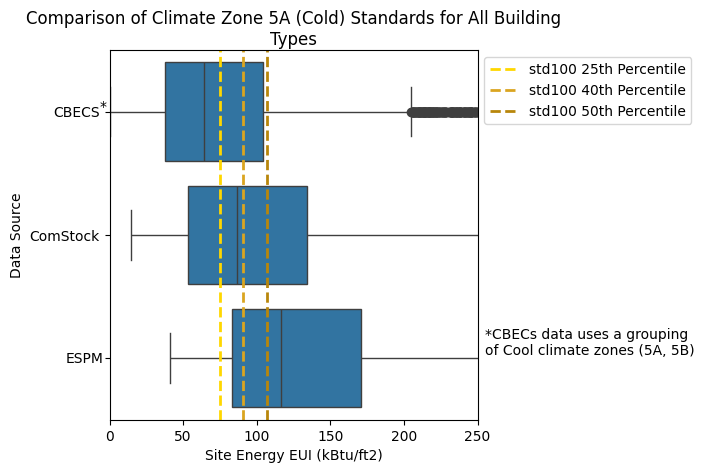

In [92]:
all_buildings_figure(
    cbecs_climate_zone, comstock_climate_zone, espm_climate_zone, std_climate_zone, climate_zone_descriptor, cbecs_footnote_text
)

In [93]:
all_buildings_percentile_comparisons(
    cbecs_climate_zone, comstock_climate_zone, espm_climate_zone, std_climate_zone, climate_zone_descriptor
)

EUI _kBTUft2
ESPM_Percentile_25     82.958442

PercentileType  EUI _kBTUft2
0     CBECS_Percentile_25     37.779646
3  ComStock_Percentile_25     53.355312
6    std100_Percentile_25     74.800000
9      ESPM_Percentile_25     82.958442

PercentileType  EUI _kBTUft2
2      CBECS_Percentile_50     64.182600
5   ComStock_Percentile_50     86.333078
8     std100_Percentile_50    106.781818
10      ESPM_Percentile_50    116.394805

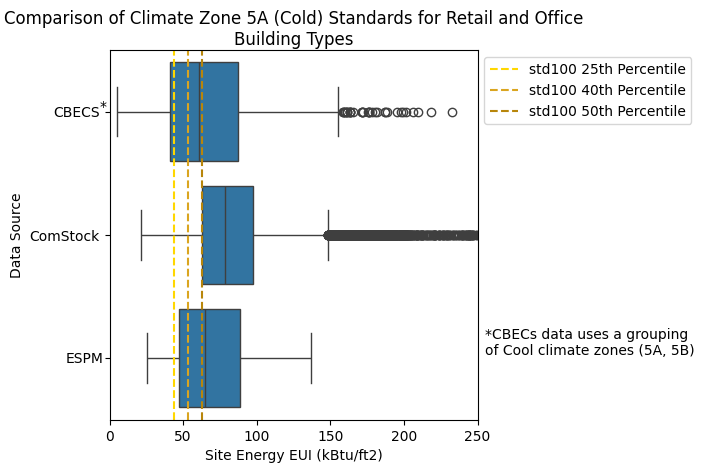

In [94]:
retail_and_office_buildings_figure(
    cbecs_climate_zone, comstock_climate_zone, espm_climate_zone, std_climate_zone, climate_zone_descriptor, cbecs_footnote_text
)

# Climate Zone 5B

In [95]:
# Define parameters for functions

cbecs_climate_zone = 2
comstock_climate_zone = "5B"
espm_climate_zone = "5B"
std_climate_zone = "5B"
climate_zone_descriptor = "(Cold)"
cbecs_footnote_text = "*CBECs data uses a grouping of Cool climate zones (5A, 5B)"

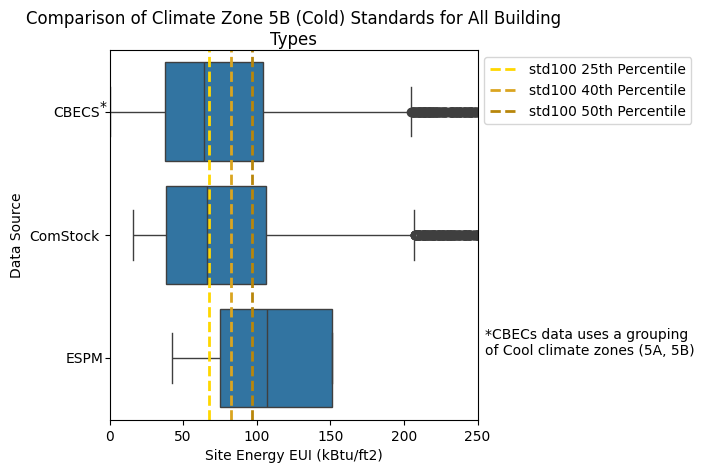

In [96]:
all_buildings_figure(
    cbecs_climate_zone, comstock_climate_zone, espm_climate_zone, std_climate_zone, climate_zone_descriptor, cbecs_footnote_text
)

In [97]:
all_buildings_percentile_comparisons(
    cbecs_climate_zone, comstock_climate_zone, espm_climate_zone, std_climate_zone, climate_zone_descriptor
)

EUI _kBTUft2
ESPM_Percentile_25     74.892857

PercentileType  EUI _kBTUft2
0     CBECS_Percentile_25     37.779646
3  ComStock_Percentile_25     38.667059
6    std100_Percentile_25     67.818182
9      ESPM_Percentile_25     74.892857

PercentileType  EUI _kBTUft2
2      CBECS_Percentile_50     64.182600
5   ComStock_Percentile_50     65.917944
8     std100_Percentile_50     96.890909
10      ESPM_Percentile_50    107.140000

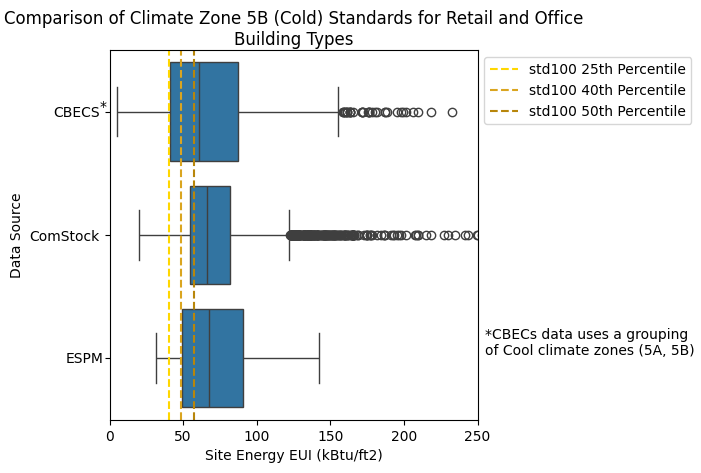

In [98]:
retail_and_office_buildings_figure(
    cbecs_climate_zone, comstock_climate_zone, espm_climate_zone, std_climate_zone, climate_zone_descriptor, cbecs_footnote_text
)

# Climate Zone 6A

In [99]:
# Define parameters for functions

cbecs_climate_zone = 1
comstock_climate_zone = "6A"
espm_climate_zone = "6A"
std_climate_zone = "6A"
climate_zone_descriptor = "(Cold)"
cbecs_footnote_text = "*CBECs data uses a grouping of Cold and Very Cold climate zones (6A, 6B, 7, 8)"

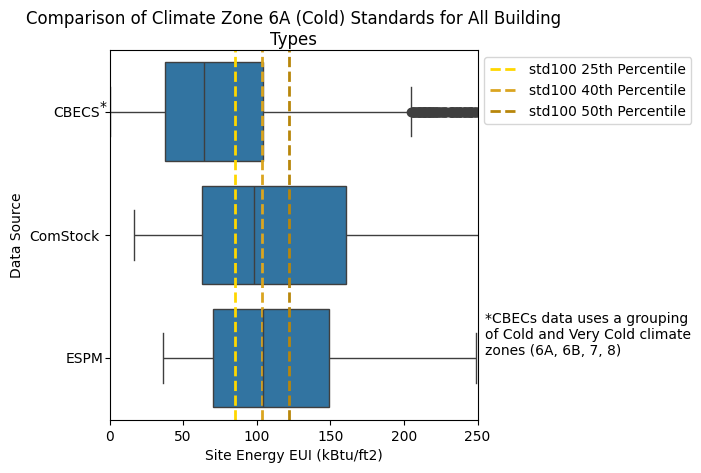

In [100]:
all_buildings_figure(
    cbecs_climate_zone, comstock_climate_zone, espm_climate_zone, std_climate_zone, climate_zone_descriptor, cbecs_footnote_text
)

In [101]:
all_buildings_percentile_comparisons(
    cbecs_climate_zone, comstock_climate_zone, espm_climate_zone, std_climate_zone, climate_zone_descriptor
)

EUI _kBTUft2
ESPM_Percentile_25     70.563077

PercentileType  EUI _kBTUft2
0     CBECS_Percentile_25     37.779646
3  ComStock_Percentile_25     62.647570
6    std100_Percentile_25     85.254545
9      ESPM_Percentile_25     70.563077

PercentileType  EUI _kBTUft2
2      CBECS_Percentile_50     64.182600
5   ComStock_Percentile_50     98.238430
8     std100_Percentile_50    121.872727
10      ESPM_Percentile_50    103.941538

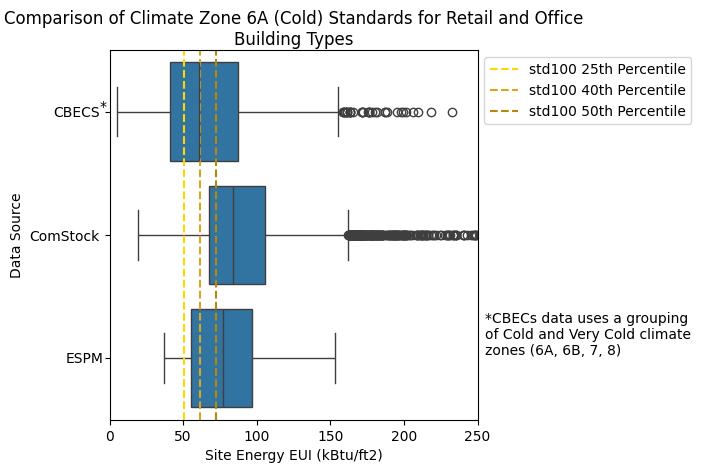

In [102]:
retail_and_office_buildings_figure(
    cbecs_climate_zone, comstock_climate_zone, espm_climate_zone, std_climate_zone, climate_zone_descriptor, cbecs_footnote_text
)

# Climate Zone 6B

In [103]:
# Define parameters for functions

cbecs_climate_zone = 1
comstock_climate_zone = "6B"
espm_climate_zone = "6B"
std_climate_zone = "6B"
climate_zone_descriptor = "(Cold)"
cbecs_footnote_text = "*CBECs data uses a grouping of Cold and Very Cold climate zones (6A, 6B, 7, 8)"

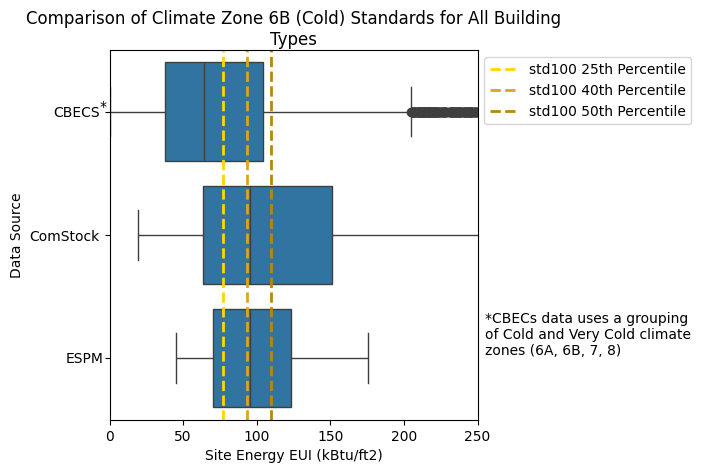

In [104]:
all_buildings_figure(
    cbecs_climate_zone, comstock_climate_zone, espm_climate_zone, std_climate_zone, climate_zone_descriptor, cbecs_footnote_text
)

In [105]:
all_buildings_percentile_comparisons(
    cbecs_climate_zone, comstock_climate_zone, espm_climate_zone, std_climate_zone, climate_zone_descriptor
)

EUI _kBTUft2
ESPM_Percentile_25     70.418182

PercentileType  EUI _kBTUft2
0     CBECS_Percentile_25     37.779646
3  ComStock_Percentile_25     63.733759
6    std100_Percentile_25     76.781818
9      ESPM_Percentile_25     70.418182

PercentileType  EUI _kBTUft2
2      CBECS_Percentile_50     64.182600
5   ComStock_Percentile_50     95.499443
8     std100_Percentile_50    109.618182
10      ESPM_Percentile_50     95.218182

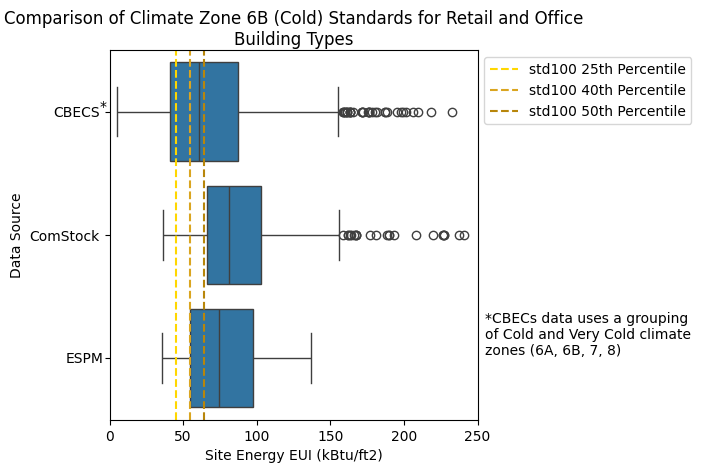

In [106]:
retail_and_office_buildings_figure(
    cbecs_climate_zone, comstock_climate_zone, espm_climate_zone, std_climate_zone, climate_zone_descriptor, cbecs_footnote_text
)

# Climate Zone 7

In [107]:
# Define parameters for functions

cbecs_climate_zone = 1
comstock_climate_zone = "7"
espm_climate_zone = "7"
std_climate_zone = 7
climate_zone_descriptor = "(Very Cold)"
cbecs_footnote_text = "*CBECs data uses a grouping of Cold and Very Cold climate zones (6A, 6B, 7, 8)"

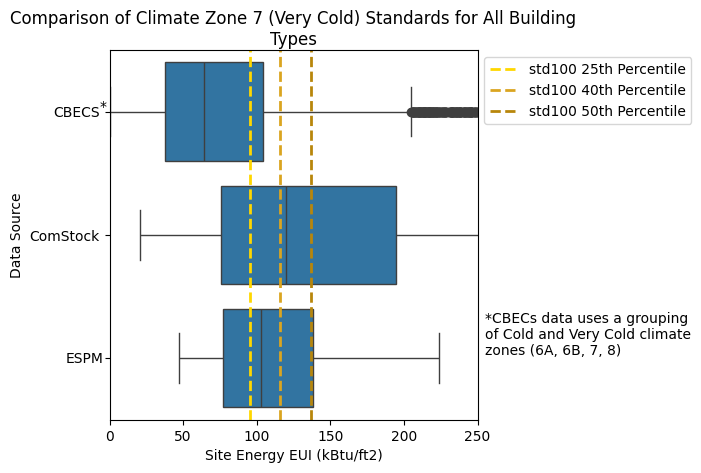

In [108]:
all_buildings_figure(
    cbecs_climate_zone, comstock_climate_zone, espm_climate_zone, std_climate_zone, climate_zone_descriptor, cbecs_footnote_text
)

In [109]:
all_buildings_percentile_comparisons(
    cbecs_climate_zone, comstock_climate_zone, espm_climate_zone, std_climate_zone, climate_zone_descriptor
)

EUI _kBTUft2
ESPM_Percentile_25     77.023333

PercentileType  EUI _kBTUft2
0     CBECS_Percentile_25     37.779646
3  ComStock_Percentile_25     75.851287
6    std100_Percentile_25     95.690909
9      ESPM_Percentile_25     77.023333

PercentileType  EUI _kBTUft2
2      CBECS_Percentile_50     64.182600
5   ComStock_Percentile_50    119.698015
8     std100_Percentile_50    136.600000
10      ESPM_Percentile_50    102.733333

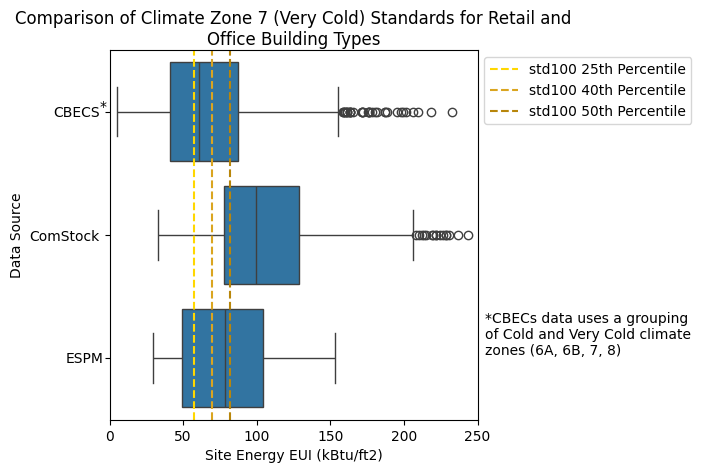

In [110]:
retail_and_office_buildings_figure(
    cbecs_climate_zone, comstock_climate_zone, espm_climate_zone, std_climate_zone, climate_zone_descriptor, cbecs_footnote_text
)